In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [229]:
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('./train.csv')  # 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

In [3]:
submission = pd.read_csv("./sample_submission.csv")

In [4]:
train.head() # 데이터 상위 5개를 확인합니다.

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [5]:
train.shape # 데이터를 모양을 확인합니다.

(1253, 10)

In [6]:
test.shape

(2924, 9)

In [7]:
submission.shape

(2924, 2)

In [8]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [9]:
test.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [10]:
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [11]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


In [12]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col

check_missing_col(train)


결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다


[]

In [13]:
check_missing_col(test)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다


[]

In [14]:
train = train.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.
test = test.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.

In [15]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [16]:
temp = train['Target'].unique() # Target의 중복되지 않은 값을 출력합니다.
np.sort(temp) # 오름차순으로 정렬합니다.

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29], dtype=int64)

In [17]:
train.groupby('Target').count().iloc[:,0] # Target 값 별로 데이터의 개수를 세어줍니다.

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

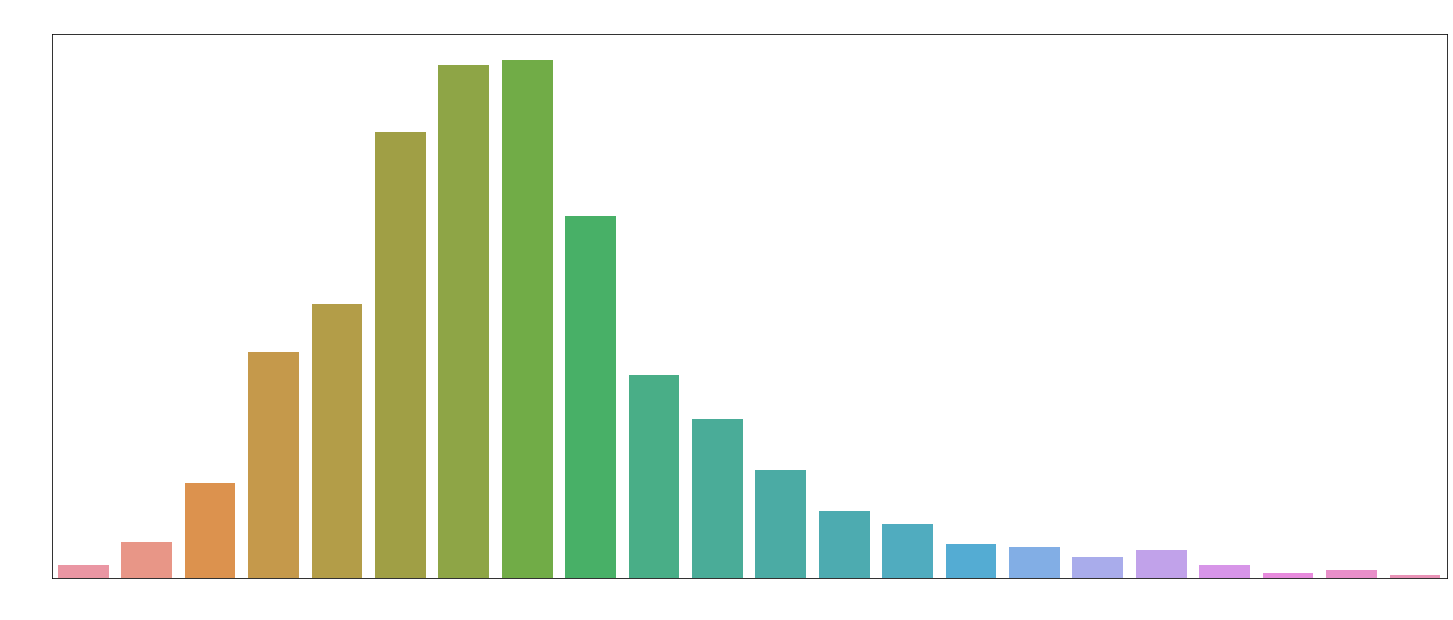

In [18]:
# 전복의 나이 분포 시각화
plt.rcParams["figure.figsize"] = [25,10]
sns.countplot("Target", data = train)
plt.title("전복 나이 별 카운트", fontsize = 30)
plt.xlabel("target(age)", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.show()

In [19]:
temp1 = train["Target"] == 29
temp2 = train["Target"] == 23
train[temp1 | temp2] # 가장 나이가 많은 29세와 23세의 데이터 프레임을 합침

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23


In [20]:
train[train["Target"] == 3] # 가장 나이가 작은 3세의 데이터 프레임

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


In [21]:
train["Gender"].value_counts()

M    469
I    404
F    380
Name: Gender, dtype: int64

In [22]:
test["Gender"].value_counts()

M    1059
I     938
F     927
Name: Gender, dtype: int64

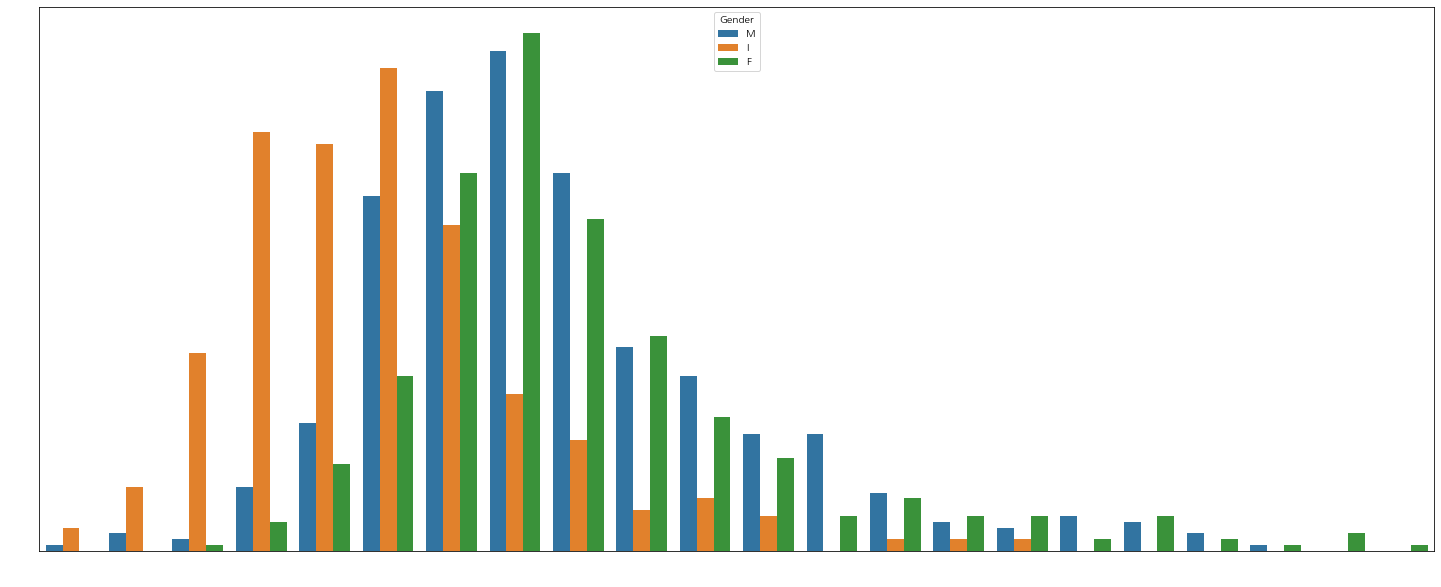

In [23]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Target", hue = "Gender", data = train)
plt.show()

# 데이터 프레임 상으로도 23,29세에 비하여 3세의 전복이 전반적으로 수치가 낮음
# 또한 Gender가 23, 29세인 전복이 모두 F


In [24]:
train.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [25]:
print(train['Gender'].unique()) # Gender의 중복되지 않은 값을 출력합니다.

['M' 'I' 'F']


In [26]:
train.groupby(["Gender"]).count()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Gender,,,,,,,,
F,380,380,380,380,380,380,380,380
I,404,404,404,404,404,404,404,404
M,469,469,469,469,469,469,469,469


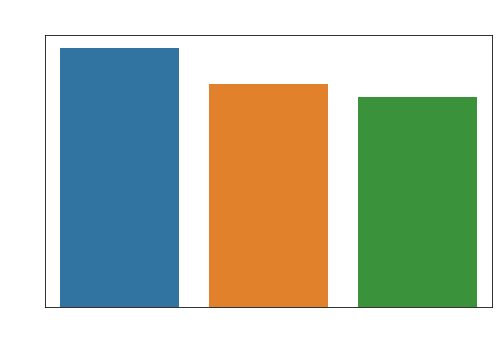

In [27]:
# 성별 데이터 개수 그래프
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot("Gender", data = train)
plt.title("성별 데이터 개수 - train",fontsize=30)
plt.show()

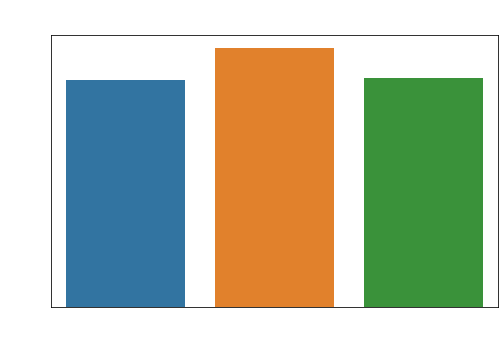

In [28]:
# 성별 데이터 개수 그래프
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot("Gender", data = test)
plt.title("성별 데이터 개수 - test",fontsize=30)
plt.show()

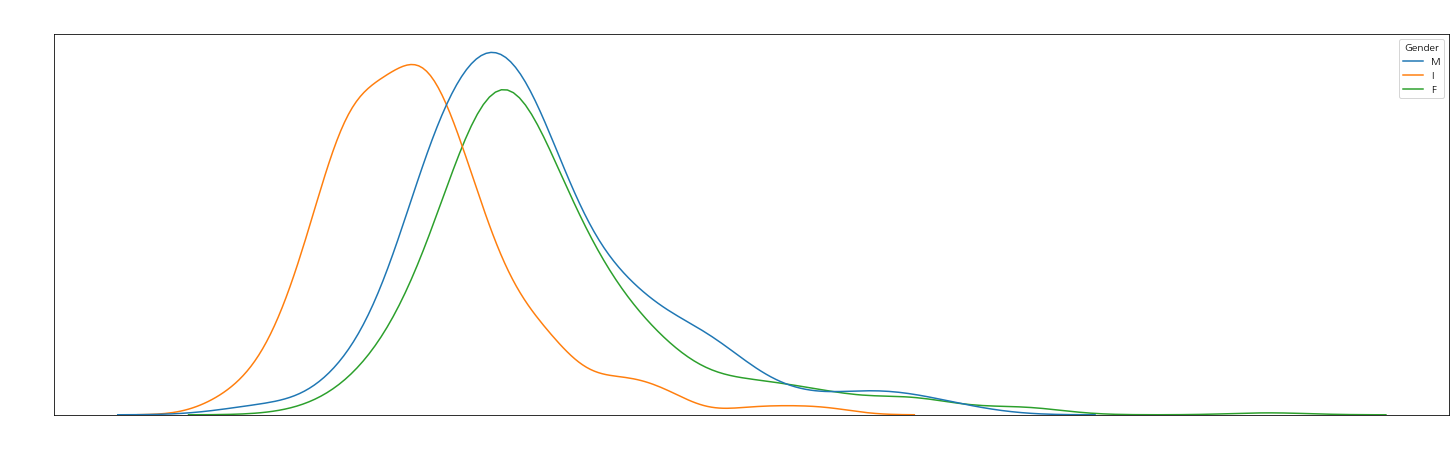

In [29]:
# 성별에 따른 나이 분포 그래프
plt.figure(figsize = (25,7))
sns.kdeplot("Target", hue = "Gender", data= train)
plt.title("성별에 따른 나이 분포", fontsize = 30)
plt.xlabel("target(Age)", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.show()

In [30]:
def corr_heatmap(data):

    # 상관계수그래프
    # 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
    from sklearn.preprocessing import LabelEncoder
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    corr_df = data.copy()
    corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

    # 상관관계 분석도
    plt.figure(figsize=(15,10))

    heat_table = corr_df.corr()
    mask = np.zeros_like(heat_table)
    mask[np.triu_indices_from(mask)] = True
    heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
    heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
    heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
    plt.title('correlation between features', fontsize=40)
    plt.show()

In [31]:
train_pre = train.copy()
test_pre = test.copy()
train_pre = pd.get_dummies(train_pre)
test_pre  = pd.get_dummies(test_pre)

In [32]:
train_pre.columns

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target', 'Gender_F', 'Gender_I',
       'Gender_M'],
      dtype='object')

In [33]:
train_pre = train_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Target"]]
test_pre = test_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]]

# Gender  : 전복 성별
# Length : 전복 길이
# Diameter : 전복 둘레
# Height : 전복 키
# Whole Weight : 전복 전체 무게 
# Shucked Weight : 껍질을 제외한 무게
# Viscra Weight : 내장 무게
# Shell Weight : 껍질 무게

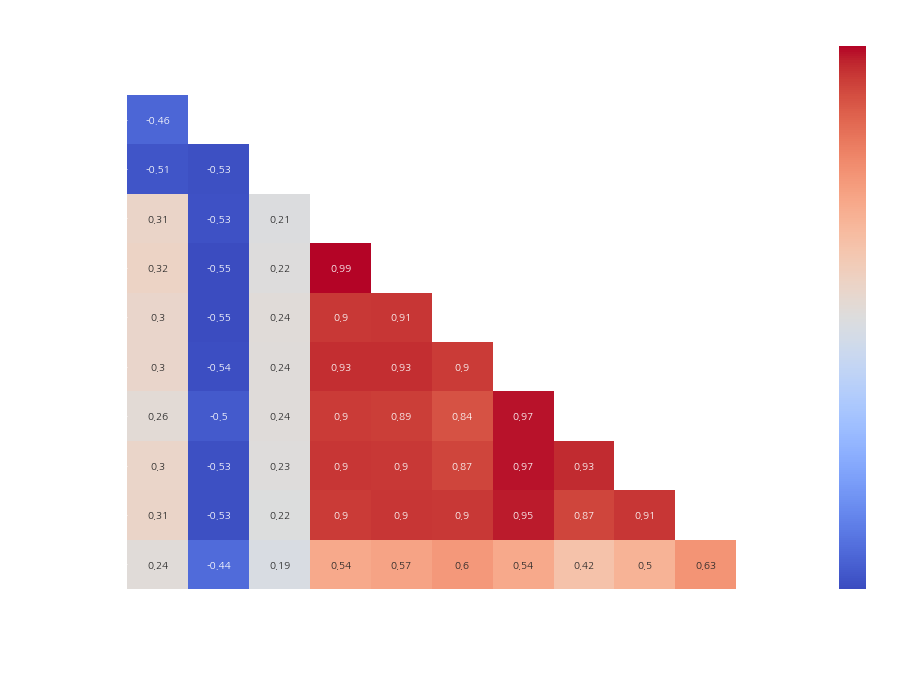

In [34]:
corr_heatmap(train_pre)

In [35]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


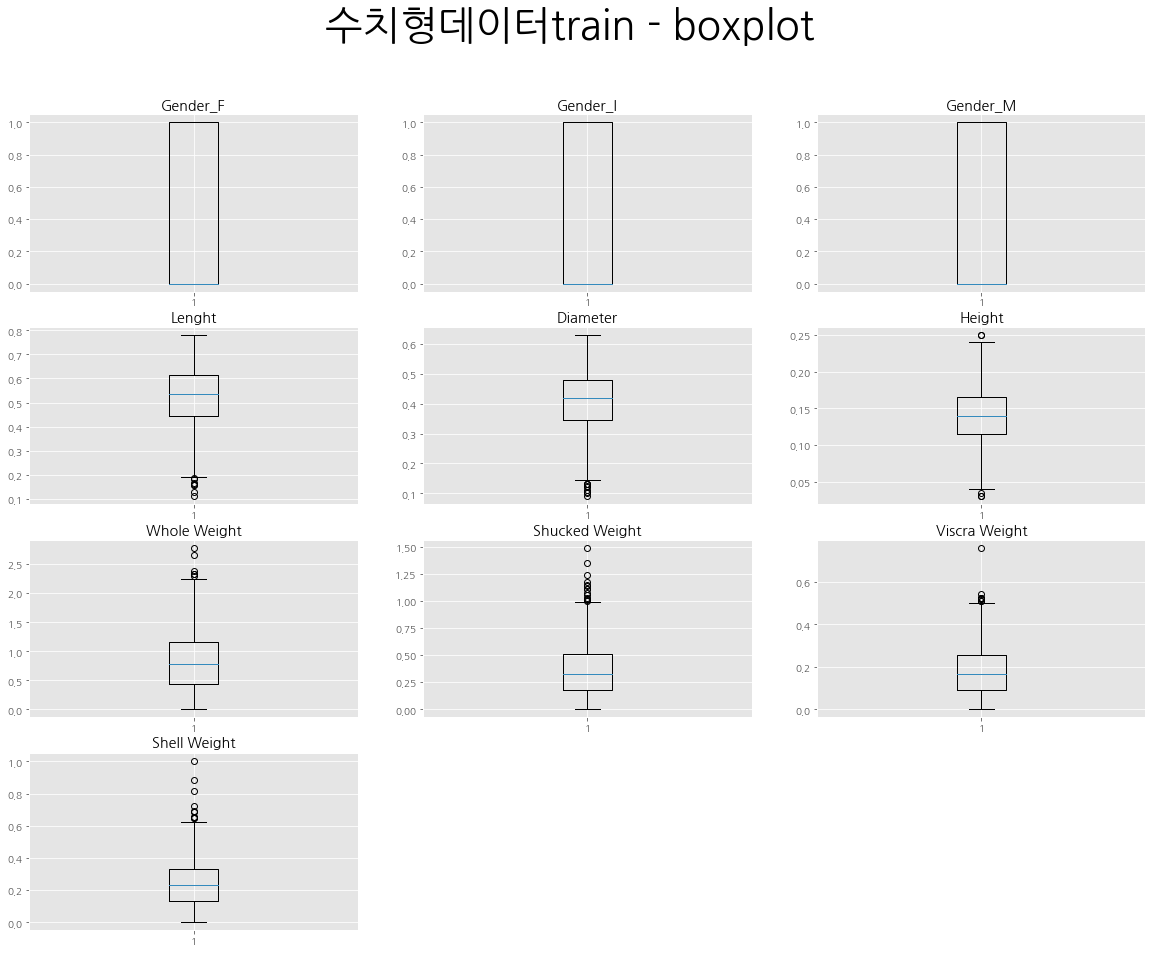

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = ["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i], color = "black")
    plt.boxplot(train_pre[feature[i]])
plt.show()

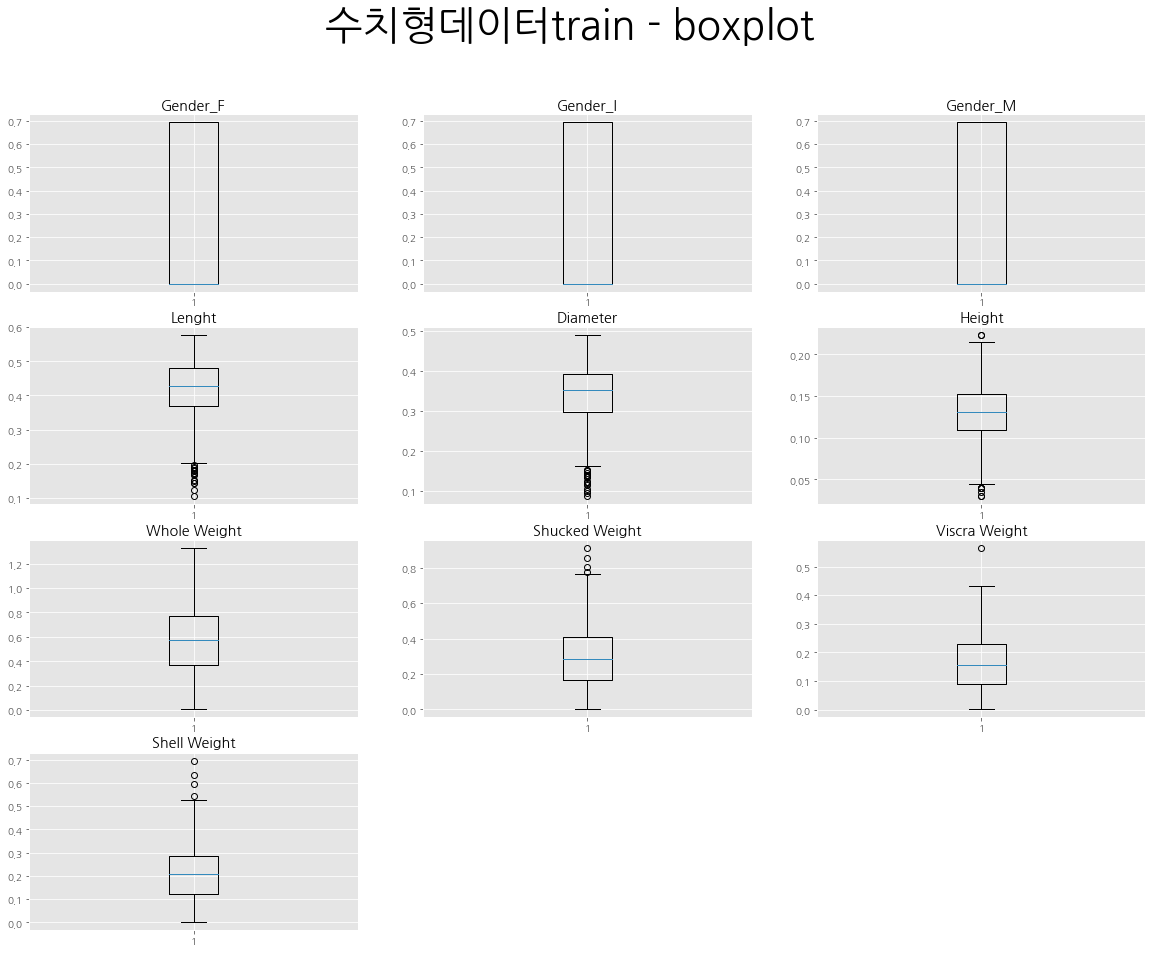

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = ["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i], color = "black")
    plt.boxplot(np.log1p(train_pre[feature[i]]))
plt.show()

## 이변량 분석 - 길이, 둘레, 키, 무게 vs Target

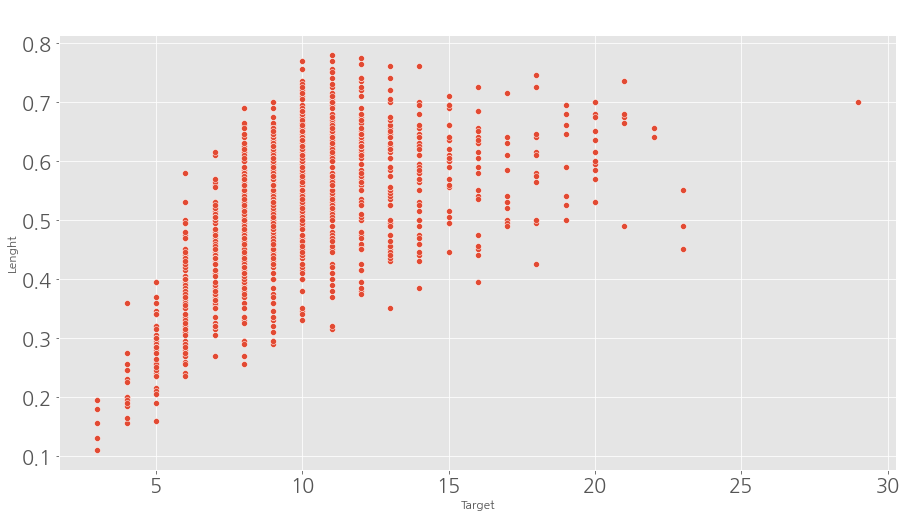

In [38]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Lenght", data = train_pre)
plt.title("Length vs Target", size = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

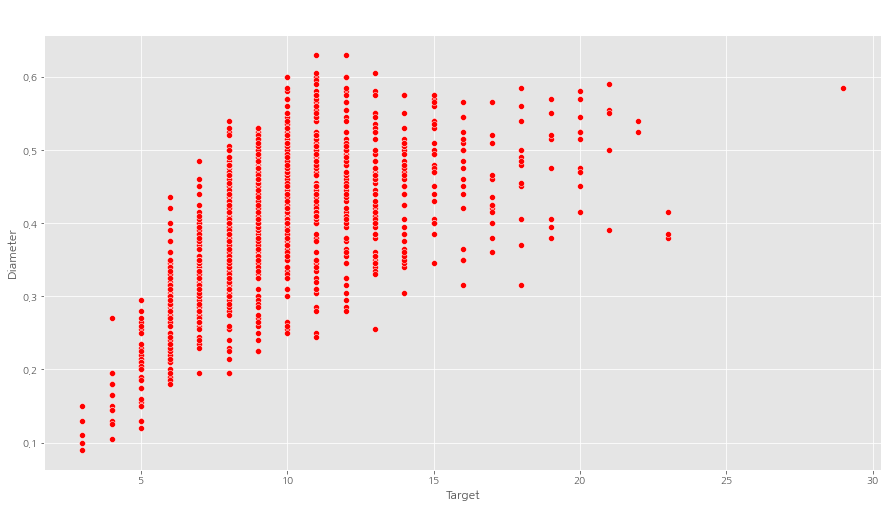

In [39]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Diameter", data = train_pre, color = "red")
plt.title("Diameter vs Target", size = 30)
plt.show()

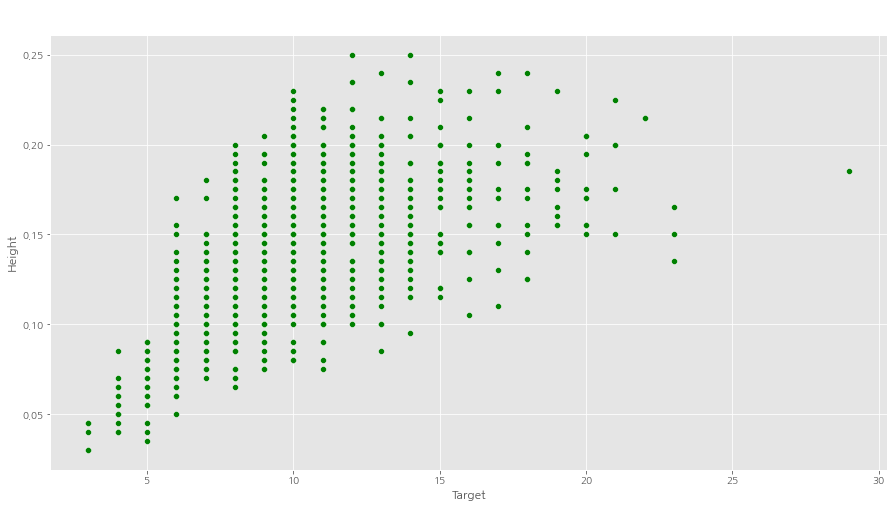

In [40]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Height", data = train_pre, color = "green")
plt.title("Height vs Target", size = 30)
plt.show()

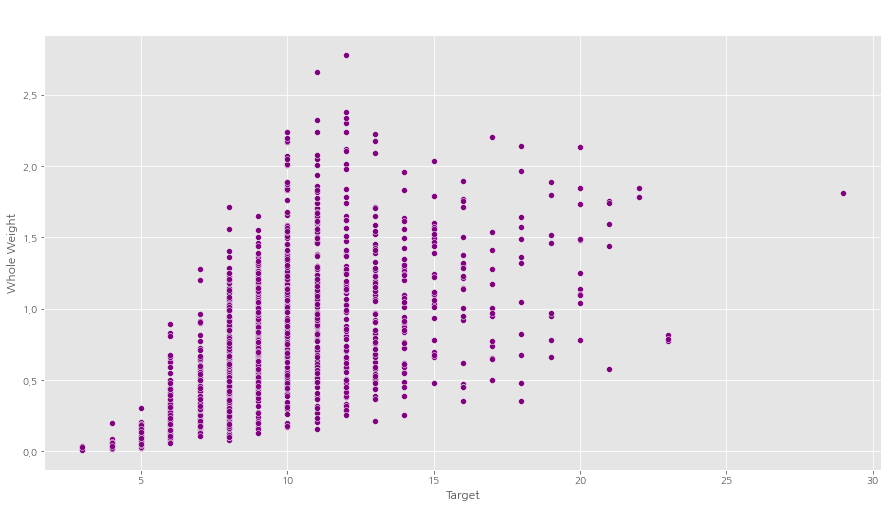

In [41]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Whole Weight", data = train_pre, color = "purple")
plt.title("Weight vs Target", size = 30)
plt.show()

In [42]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [43]:
train_pre.groupby(["Target"])[["Lenght","Diameter","Height","Whole Weight"]].min()

,Lenght,Diameter,Height,Whole Weight
Target,,,,
3,0.110,0.090,0.030,0.0080
4,0.155,0.105,0.040,0.0175
5,0.160,0.120,0.035,0.0210
6,0.235,0.180,0.050,0.0580
7,0.270,0.195,0.070,0.1060
8,0.255,0.195,0.065,0.0800
9,0.290,0.225,0.075,0.1240
10,0.330,0.250,0.080,0.1690
11,0.315,0.245,0.075,0.1555


In [44]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


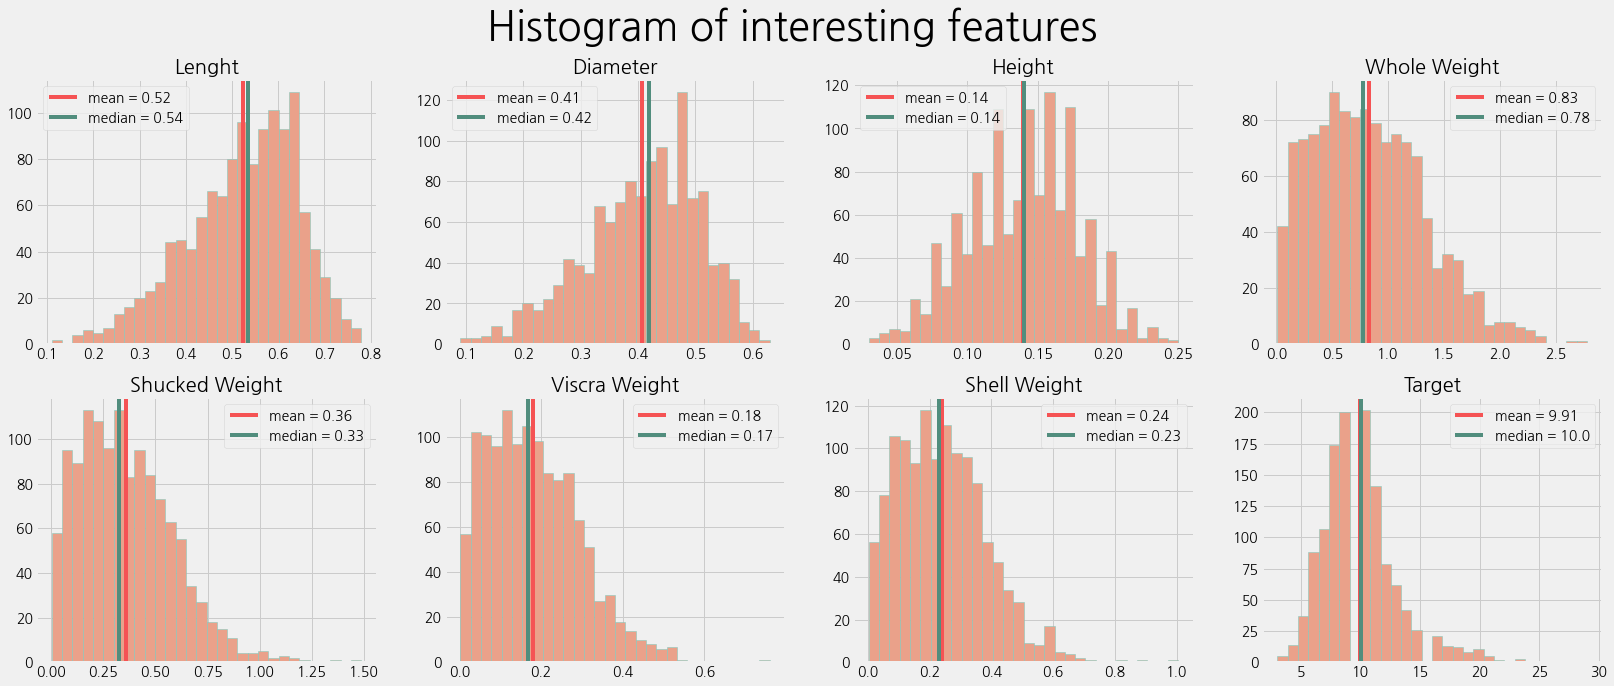

In [45]:
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

# 수치형 데이터 통계치 그래프
interest_coloumns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1

In [46]:
print('전복의 평균 나이는', round(data_description[interest_coloumns[7]]['mean'],1), '입니다') #round를 하여 소수점 1의 자리까지 반올림 하였습니다.

전복의 평균 나이는 9.9 입니다


In [47]:
# 29살 이상치라 판단
train_pre[train_pre["Target"] > 20]

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,0,0,1,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,1,0,0,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,1,0,0,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,0,0,1,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,1,0,0,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,1,0,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,0,0,1,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,1,0,0,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,0,0,1,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,1,0,0,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [48]:
# 이상치 제거
train_pre = train_pre.drop(index = [762],axis = 0) 

In [49]:
# 전복의 전체 무게 = 껍질을 제외한 무게 + 껍질의 무게 + 물
# 전복의 전체 무게 < 껍질을 제외한 무게 + 껍질의 무게 찾기

train_pre[train_pre["Whole Weight"] < train_pre["Shucked Weight"] + train_pre["Shell Weight"]]

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,0,1,0,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,0,1,0,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,0,1,0,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,0,1,0,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,0,1,0,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [50]:
# 이상치 제거
train_pre = train_pre.drop(index = [47,382,435,847,1078], axis = 0)

In [51]:
# 내장 무게 > 전복 
train_pre[train_pre["Shucked Weight"] < train_pre["Viscra Weight"]]

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,0,0,1,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [52]:
train_pre = train_pre.drop(index = [465], axis = 0)

In [53]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [54]:
# 총 무게 = 껍질 제외한 전복 무게(shucked) + 껍질(shell) + 물(water)
# 껍질 제외한 전복 무게(shucked) = 내장(viscera) + 먹는부분(main)

train_pre["Water"] = train_pre["Whole Weight"] - (train_pre["Shucked Weight"] + train_pre["Shell Weight"])
train_pre["Main"] = train_pre["Shucked Weight"] - train_pre["Viscra Weight"]

test_pre["Water"] = test_pre["Whole Weight"] - (test_pre["Shucked Weight"] + test_pre["Shell Weight"])
test_pre["Main"] = test_pre["Shucked Weight"] - test_pre["Viscra Weight"]

In [55]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Water,Main
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0.4115,0.1015
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0.0985,0.0950
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0.3760,0.2765
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0.3855,0.2215
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0.0390,0.0170


In [56]:
train_pre = train_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Water","Main","Target"]]
test_pre = test_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Water","Main"]]

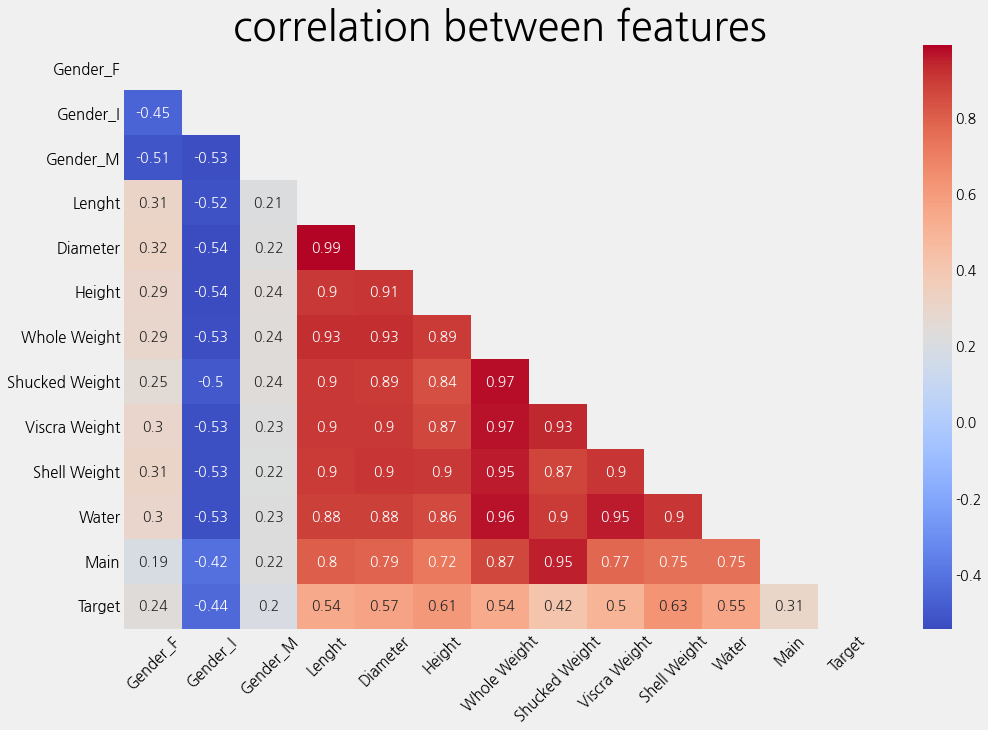

In [57]:
corr_heatmap(train_pre)

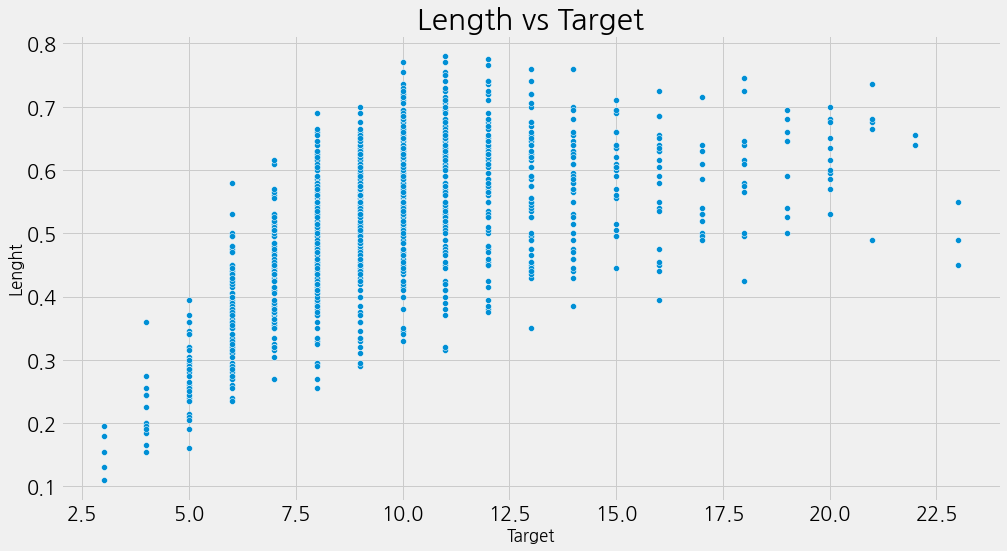

In [67]:
plt.figure(figsize = (15,8))
#plt.scatter(train_pre["Target"],train_pre["Lenght"])
sns.scatterplot(x = "Target", y = "Lenght", data = train_pre)
plt.title("Length vs Target", size = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

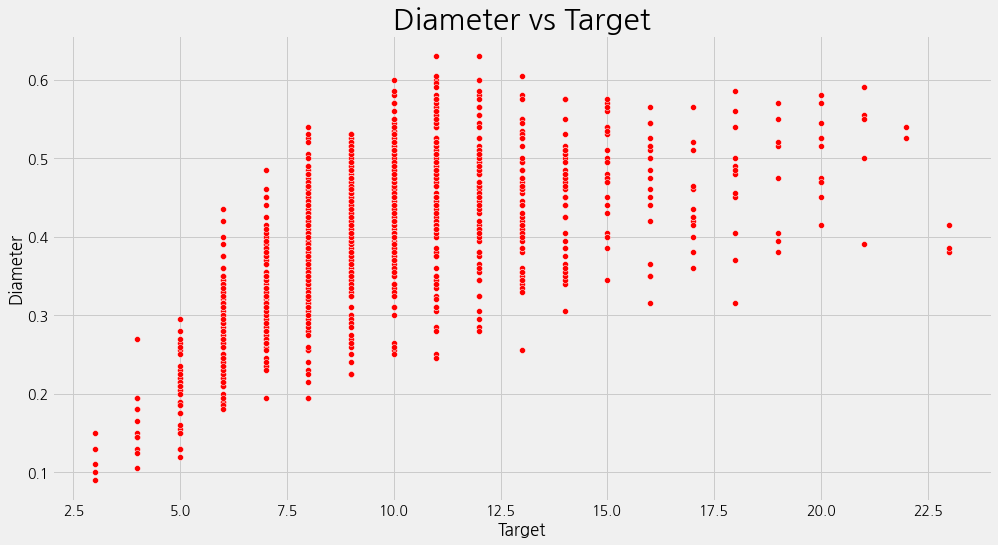

In [68]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Diameter", data = train_pre, color = "red")
plt.title("Diameter vs Target", size = 30)
plt.show()

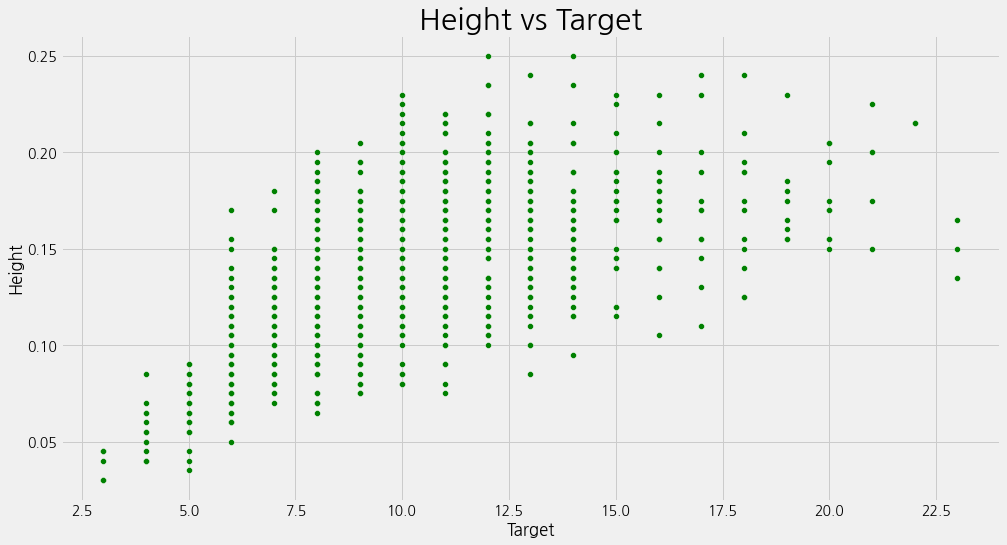

In [69]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Height", data = train_pre, color = "green")
plt.title("Height vs Target", size = 30)
plt.show()

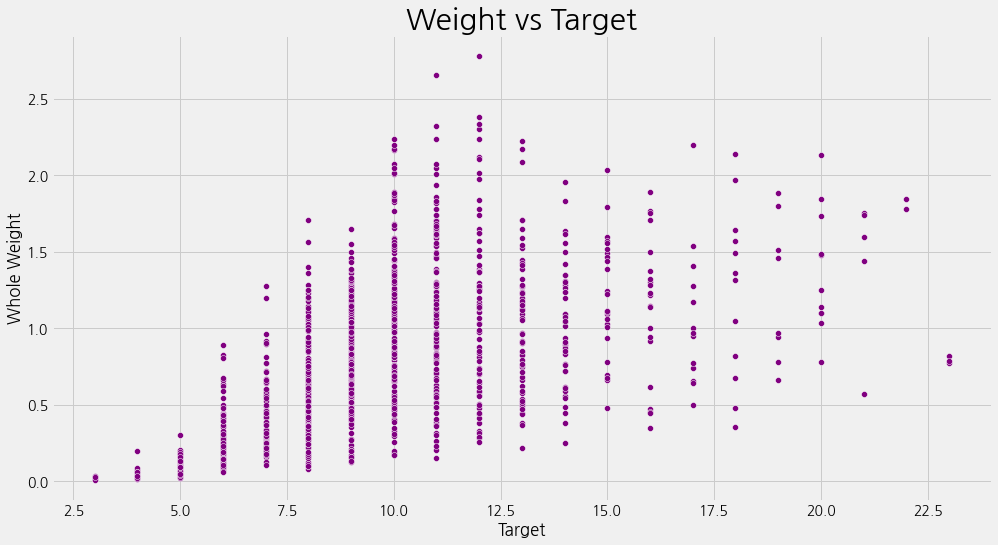

In [70]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Whole Weight", data = train_pre, color = "purple")
plt.title("Weight vs Target", size = 30)
plt.show()

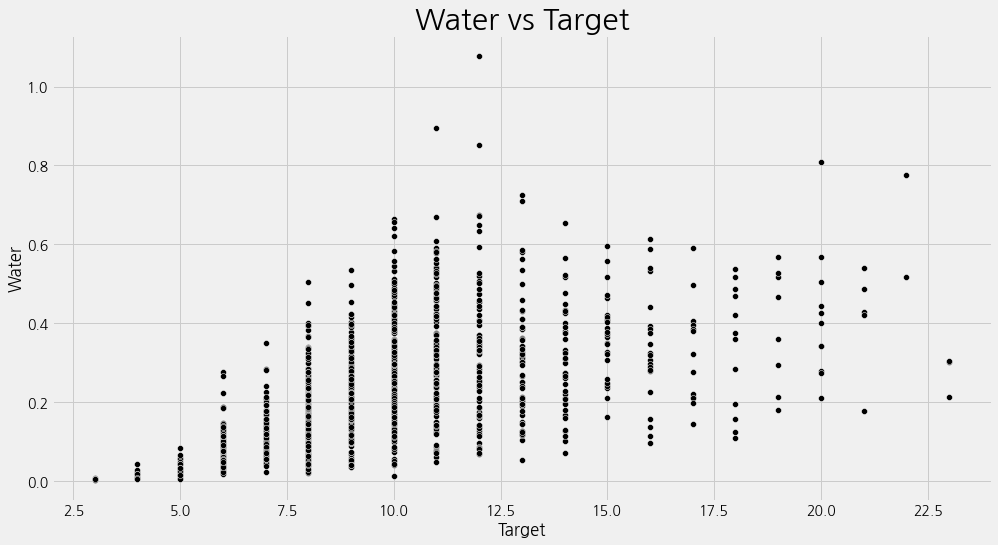

In [75]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Water", data = train_pre, color = "black")
plt.title("Water vs Target", size = 30)
plt.show()

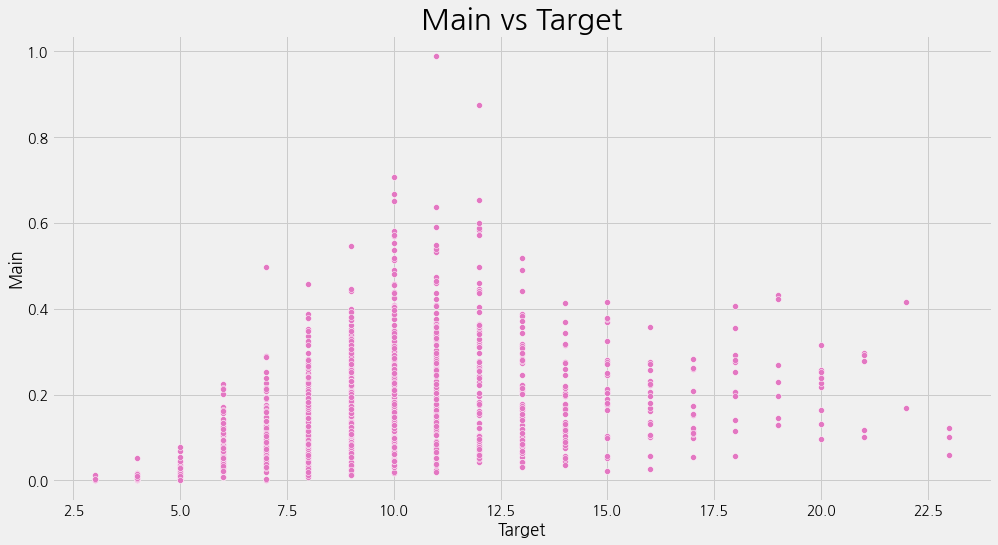

In [78]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Main", data = train_pre, color = "#e377c2")
plt.title("Main vs Target", size = 30)
plt.show()

# 11살 이상은 물을 0.20이상 먹고 있음
## 좋은 인사이트 될 듯

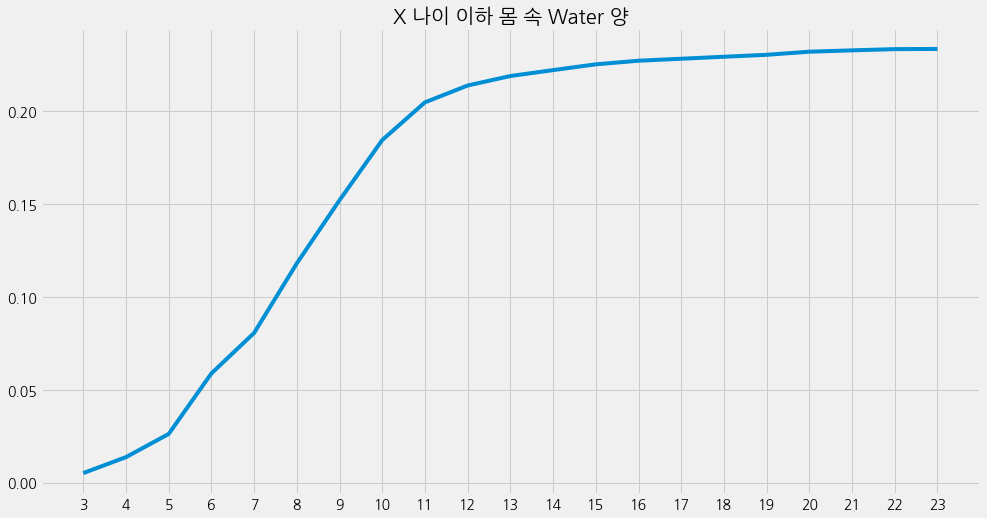

In [155]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Water"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y)
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Water 양")
plt.show()

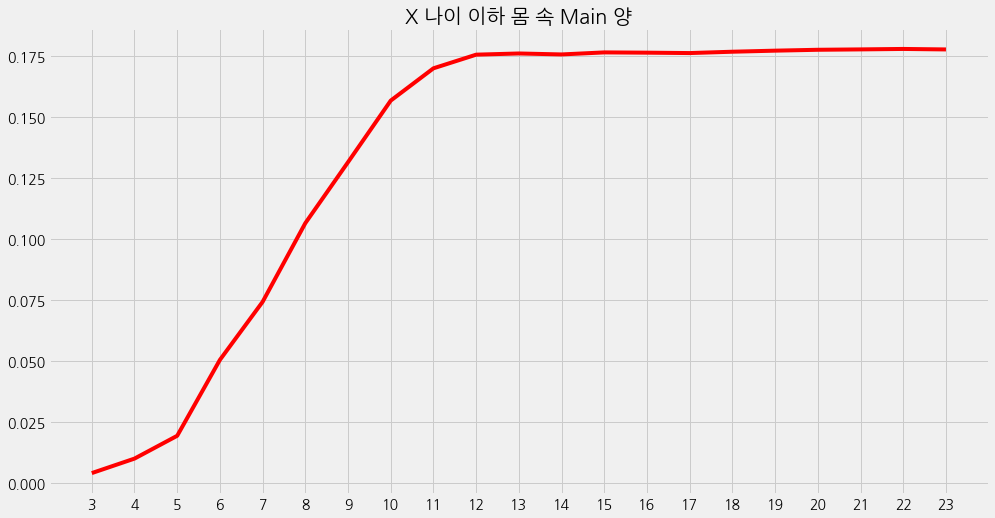

In [157]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Main"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y, color = "red")
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Main 양")
plt.show()

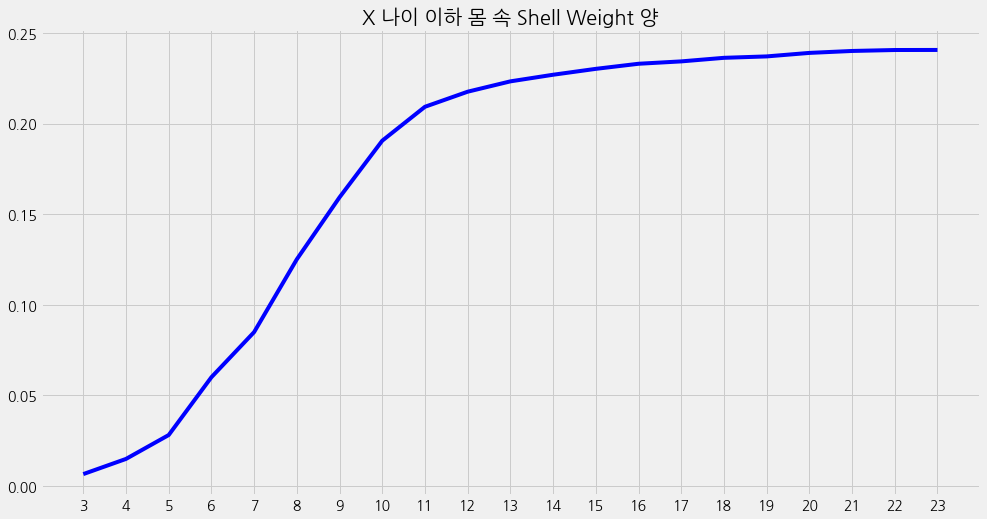

In [159]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Shell Weight"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y, color = "blue")
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Shell Weight 양")
plt.show()

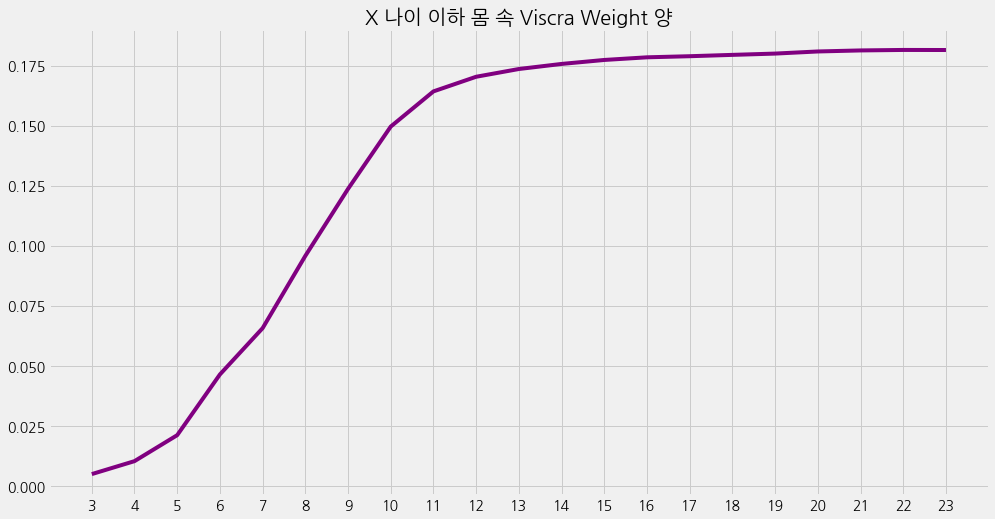

In [162]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Viscra Weight"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y, color = "purple")
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Viscra Weight 양")
plt.show()

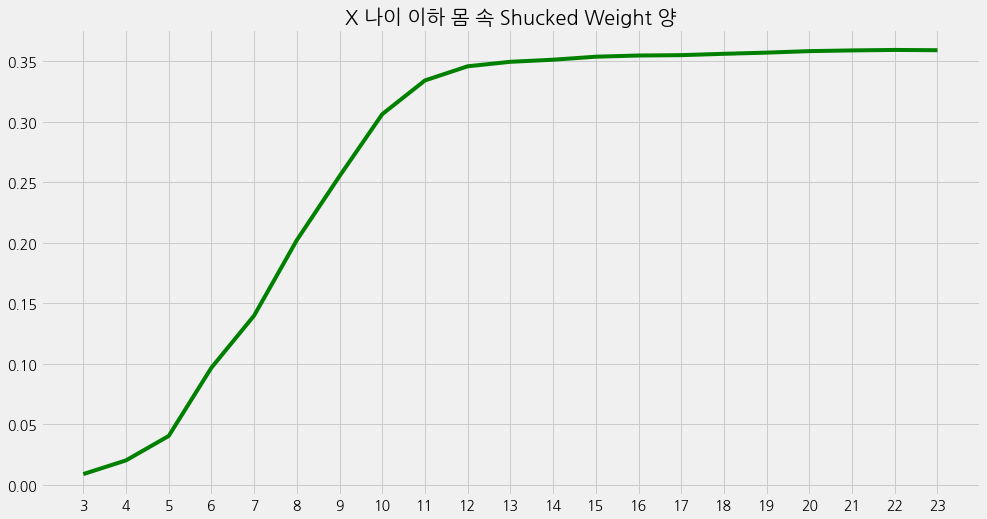

In [164]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Shucked Weight"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y, color = "green")
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Shucked Weight 양")
plt.show()

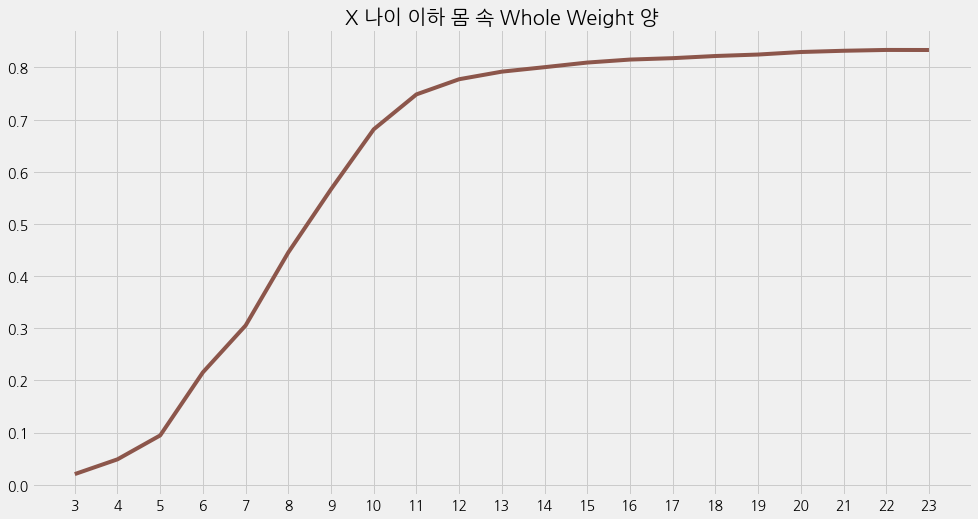

In [165]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Whole Weight"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y, color = "#8c564b")
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Whole Weight 양")
plt.show()

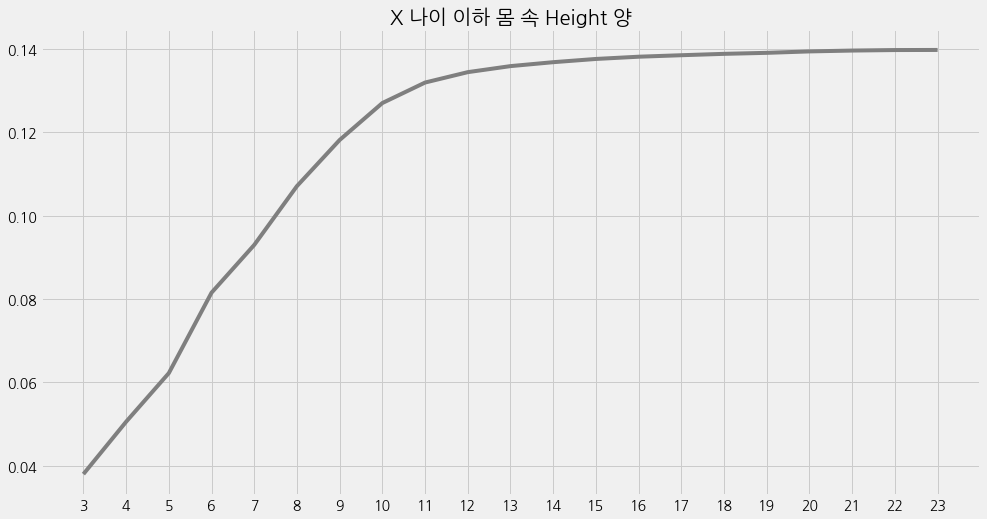

In [166]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Height"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y, color = "#7f7f7f")
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Height 양")
plt.show()

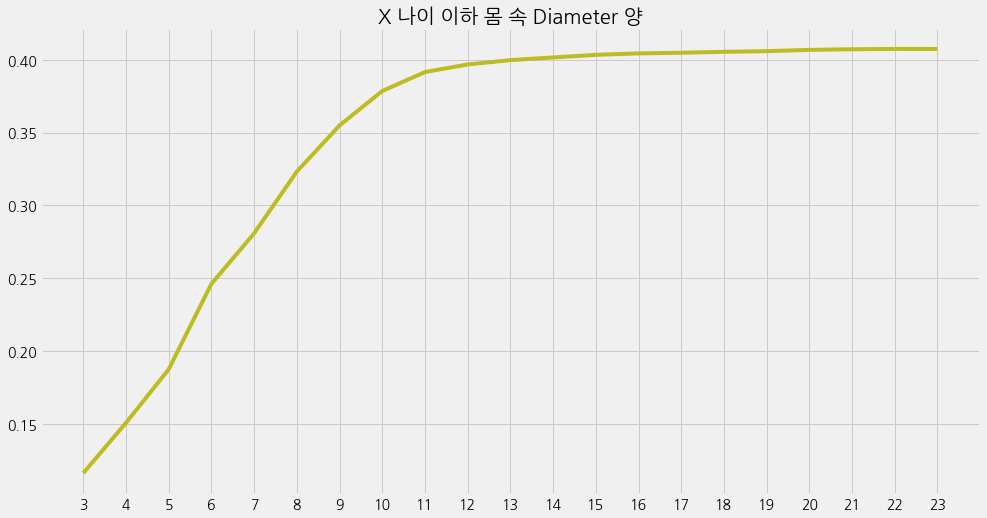

In [168]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Diameter"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y, color = "#bcbd22")
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Diameter 양")
plt.show()

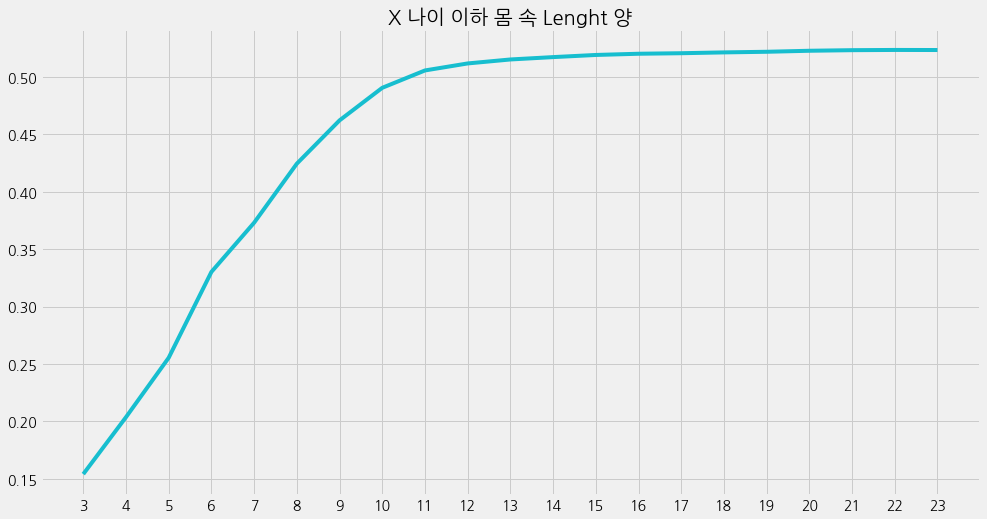

In [169]:
age_list_x = sorted(train_pre["Target"].unique())

age_list_y = [train_pre[train_pre["Target"] <= age]["Lenght"].mean() for age in age_list_x]

plt.figure(figsize = (15,8))
plt.plot(age_list_x, age_list_y, color = "#17becf")
plt.xticks(age_list_x)
plt.title("X 나이 이하 몸 속 Lenght 양")
plt.show()

In [187]:
mean_11 = train_pre[train_pre["Target"] == 11].mean().to_dict()
mean_12 = train_pre[train_pre["Target"] == 12].mean().to_dict()

In [258]:
# Lenght_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Lenght_age"] = train_pre["Lenght"].apply(lambda x : 1 if x >= mean_12["Lenght"] else 0)

# Diameter_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Diameter_age"] = train_pre["Diameter"].apply(lambda x : 1 if x >= mean_12["Diameter"] else 0)

# Height_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Height_age"] = train_pre["Height"].apply(lambda x : 1 if x >= mean_12["Height"] else 0)


# Whole Weight_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Whole Weight_age"] = train_pre["Whole Weight"].apply(lambda x : 1 if x >= mean_12["Whole Weight"] else 0)

# Shucked Weight_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Shucked Weight_age"] = train_pre["Shucked Weight"].apply(lambda x : 1 if x >= mean_12["Shucked Weight"] else 0)

# Viscra Weight_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Viscra Weight_age"] = train_pre["Viscra Weight"].apply(lambda x : 1 if x >= mean_12["Viscra Weight"] else 0)

# Shell Weight_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Shell Weight_age"] = train_pre["Shell Weight"].apply(lambda x : 1 if x >= mean_12["Shell Weight"] else 0)

# Main_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Main_age"] = train_pre["Main"].apply(lambda x : 1 if x >= mean_12["Main"] else 0)

# Water_age
# 11살, 12살쯤으로 하면 좋을 듯
train_pre["Water_age"] = train_pre["Water"].apply(lambda x : 1 if x >= mean_12["Water"] else 0)



In [259]:
# Lenght_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Lenght_age"] = test_pre["Lenght"].apply(lambda x : 1 if x >= mean_12["Lenght"] else 0)

# Diameter_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Diameter_age"] = test_pre["Diameter"].apply(lambda x : 1 if x >= mean_12["Diameter"] else 0)

# Height_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Height_age"] = test_pre["Height"].apply(lambda x : 1 if x >= mean_12["Height"] else 0)


# Whole Weight_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Whole Weight_age"] = test_pre["Whole Weight"].apply(lambda x : 1 if x >= mean_12["Whole Weight"] else 0)

# Shucked Weight_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Shucked Weight_age"] = test_pre["Shucked Weight"].apply(lambda x : 1 if x >= mean_12["Shucked Weight"] else 0)

# Viscra Weight_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Viscra Weight_age"] = test_pre["Viscra Weight"].apply(lambda x : 1 if x >= mean_12["Viscra Weight"] else 0)

# Shell Weight_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Shell Weight_age"] = test_pre["Shell Weight"].apply(lambda x : 1 if x >= mean_12["Shell Weight"] else 0)

# Main_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Main_age"] = test_pre["Main"].apply(lambda x : 1 if x >= mean_12["Main"] else 0)

# Water_age
# 11살, 12살쯤으로 하면 좋을 듯
test_pre["Water_age"] = test_pre["Water"].apply(lambda x : 1 if x >= mean_12["Water"] else 0)



In [260]:
train_pre = train_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Water","Main","Lenght_age","Diameter_age",\
                       "Height_age","Whole Weight_age","Shucked Weight_age","Viscra Weight_age","Shell Weight_age","Main_age","Water_age","Target"]]

test_pre = test_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Water","Main","Lenght_age","Diameter_age",\
                       "Height_age","Whole Weight_age","Shucked Weight_age","Viscra Weight_age","Shell Weight_age","Main_age","Water_age"]]

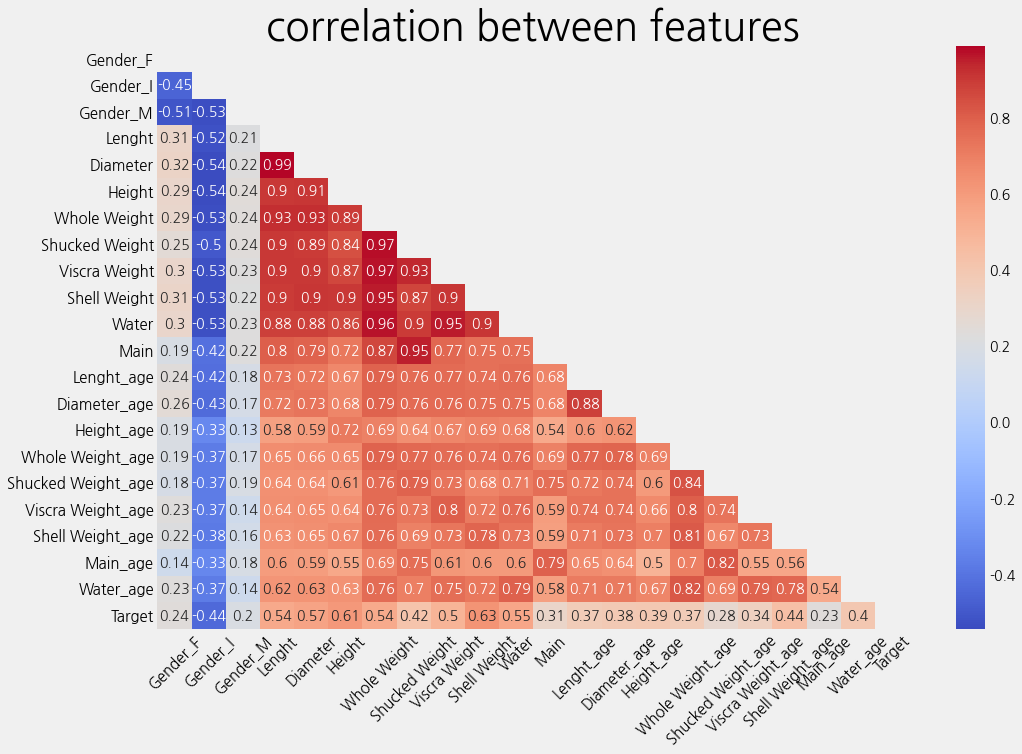

In [261]:
corr_heatmap(train_pre)

In [262]:
train.groupby(["Gender"])["Target"].mean()

Gender
F    11.086842
I     7.876238
M    10.714286
Name: Target, dtype: float64

In [263]:
train_pre.loc[train_pre["Gender_F"] == 1,"Gender_F"] = 1.1
train_pre.loc[train_pre["Gender_I"] == 1,"Gender_I"] = 0.788
train_pre.loc[train_pre["Gender_M"] == 1,"Gender_M"] = 1.07

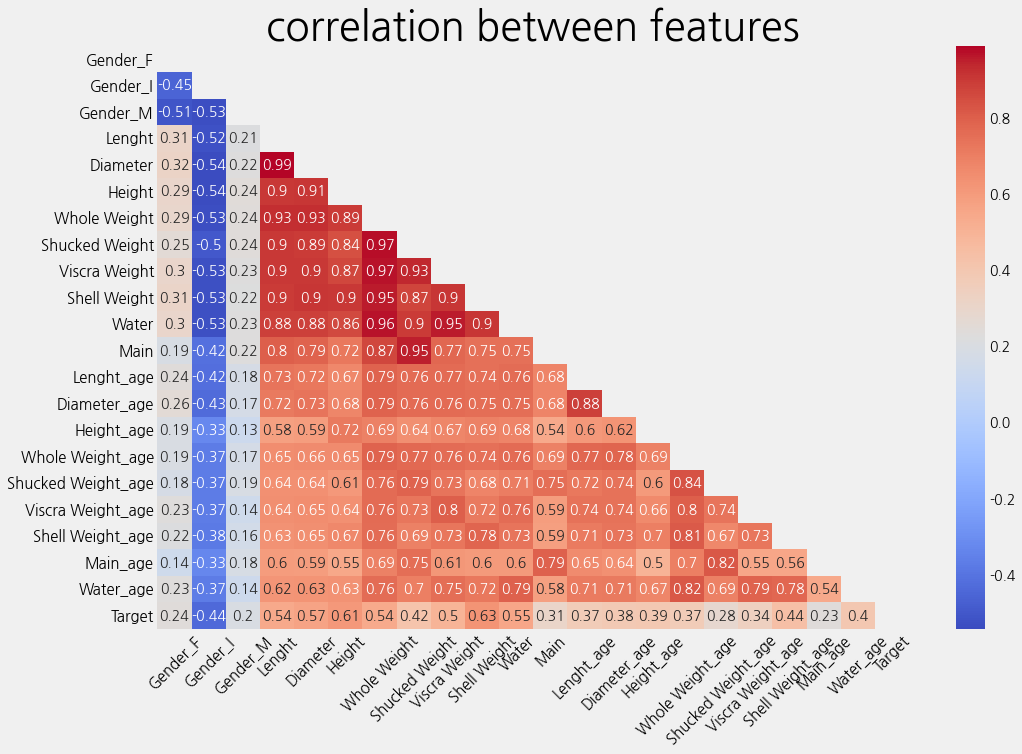

In [264]:
corr_heatmap(train_pre)

In [265]:
train_pre[:30]

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Water,Main,Lenght_age,Diameter_age,Height_age,Whole Weight_age,Shucked Weight_age,Viscra Weight_age,Shell Weight_age,Main_age,Water_age,Target
0,0.0,0.000,1.07,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,0.4115,0.1015,1,1,0,0,0,1,0,0,1,15
1,0.0,0.788,0.00,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,0.0985,0.0950,0,0,0,0,0,0,0,0,0,8
2,0.0,0.788,0.00,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,0.3760,0.2765,0,1,1,1,1,1,1,1,1,18
3,0.0,0.000,1.07,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,0.3855,0.2215,0,0,1,1,1,1,1,0,1,13
4,0.0,0.788,0.00,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,0.0390,0.0170,0,0,0,0,0,0,0,0,0,6
5,0.0,0.000,1.07,0.540,0.415,0.130,0.8245,0.2720,0.2260,0.2400,0.3125,0.0460,0,0,0,0,0,0,0,0,0,13
6,0.0,0.788,0.00,0.565,0.440,0.135,0.7680,0.3305,0.1385,0.2475,0.1900,0.1920,0,0,0,0,0,0,0,0,0,9
7,0.0,0.000,1.07,0.595,0.490,0.185,1.1850,0.4820,0.2015,0.3610,0.3420,0.2805,1,1,1,1,0,0,1,1,1,10
8,0.0,0.000,1.07,0.630,0.495,0.175,1.2695,0.6050,0.2710,0.3280,0.3365,0.3340,1,1,1,1,1,1,1,1,1,11
9,0.0,0.788,0.00,0.525,0.400,0.140,0.6540,0.3050,0.1600,0.1690,0.1800,0.1450,0,0,0,0,0,0,0,0,0,7


In [266]:
X_train = train_pre.iloc[:,:-1]
y_train = train_pre["Target"]

Cat_reg.fit(X_train,y_train)

Learning rate set to 0.042391
0:	learn: 3.1172537	total: 2.16ms	remaining: 2.15s
1:	learn: 3.0685169	total: 4.27ms	remaining: 2.13s
2:	learn: 3.0211509	total: 6.38ms	remaining: 2.12s
3:	learn: 2.9804647	total: 9.22ms	remaining: 2.29s
4:	learn: 2.9444477	total: 11.6ms	remaining: 2.3s
5:	learn: 2.9101571	total: 14ms	remaining: 2.32s
6:	learn: 2.8753804	total: 16.2ms	remaining: 2.29s
7:	learn: 2.8391754	total: 18.8ms	remaining: 2.33s
8:	learn: 2.8084458	total: 21.2ms	remaining: 2.34s
9:	learn: 2.7779347	total: 23.6ms	remaining: 2.33s
10:	learn: 2.7451293	total: 25.8ms	remaining: 2.32s
11:	learn: 2.7193676	total: 28.4ms	remaining: 2.34s
12:	learn: 2.6956231	total: 30.6ms	remaining: 2.32s
13:	learn: 2.6709744	total: 33ms	remaining: 2.32s
14:	learn: 2.6477780	total: 35.2ms	remaining: 2.31s
15:	learn: 2.6244376	total: 37.6ms	remaining: 2.31s
16:	learn: 2.6057311	total: 39.9ms	remaining: 2.31s
17:	learn: 2.5846436	total: 42.4ms	remaining: 2.31s
18:	learn: 2.5654280	total: 60.4ms	remaining: 3.1

212:	learn: 1.7882833	total: 509ms	remaining: 1.88s
213:	learn: 1.7861197	total: 512ms	remaining: 1.88s
214:	learn: 1.7845612	total: 514ms	remaining: 1.88s
215:	learn: 1.7815124	total: 517ms	remaining: 1.87s
216:	learn: 1.7803026	total: 519ms	remaining: 1.87s
217:	learn: 1.7780997	total: 521ms	remaining: 1.87s
218:	learn: 1.7774726	total: 523ms	remaining: 1.87s
219:	learn: 1.7733951	total: 526ms	remaining: 1.86s
220:	learn: 1.7727892	total: 528ms	remaining: 1.86s
221:	learn: 1.7718157	total: 531ms	remaining: 1.86s
222:	learn: 1.7688094	total: 533ms	remaining: 1.86s
223:	learn: 1.7653750	total: 535ms	remaining: 1.85s
224:	learn: 1.7634073	total: 537ms	remaining: 1.85s
225:	learn: 1.7601766	total: 540ms	remaining: 1.85s
226:	learn: 1.7586489	total: 542ms	remaining: 1.84s
227:	learn: 1.7569766	total: 544ms	remaining: 1.84s
228:	learn: 1.7556771	total: 546ms	remaining: 1.84s
229:	learn: 1.7543855	total: 549ms	remaining: 1.84s
230:	learn: 1.7528063	total: 551ms	remaining: 1.83s
231:	learn: 

370:	learn: 1.5514444	total: 857ms	remaining: 1.45s
371:	learn: 1.5498795	total: 859ms	remaining: 1.45s
372:	learn: 1.5486826	total: 861ms	remaining: 1.45s
373:	learn: 1.5463439	total: 863ms	remaining: 1.45s
374:	learn: 1.5459584	total: 866ms	remaining: 1.44s
375:	learn: 1.5452827	total: 868ms	remaining: 1.44s
376:	learn: 1.5431819	total: 870ms	remaining: 1.44s
377:	learn: 1.5418931	total: 873ms	remaining: 1.44s
378:	learn: 1.5391497	total: 875ms	remaining: 1.43s
379:	learn: 1.5384761	total: 877ms	remaining: 1.43s
380:	learn: 1.5383169	total: 879ms	remaining: 1.43s
381:	learn: 1.5381734	total: 881ms	remaining: 1.43s
382:	learn: 1.5369458	total: 884ms	remaining: 1.42s
383:	learn: 1.5360657	total: 885ms	remaining: 1.42s
384:	learn: 1.5344394	total: 887ms	remaining: 1.42s
385:	learn: 1.5340411	total: 890ms	remaining: 1.42s
386:	learn: 1.5307848	total: 892ms	remaining: 1.41s
387:	learn: 1.5301760	total: 894ms	remaining: 1.41s
388:	learn: 1.5292715	total: 896ms	remaining: 1.41s
389:	learn: 

590:	learn: 1.3217947	total: 1.38s	remaining: 953ms
591:	learn: 1.3214541	total: 1.38s	remaining: 951ms
592:	learn: 1.3202267	total: 1.38s	remaining: 949ms
593:	learn: 1.3183776	total: 1.38s	remaining: 946ms
594:	learn: 1.3166532	total: 1.39s	remaining: 944ms
595:	learn: 1.3162321	total: 1.39s	remaining: 942ms
596:	learn: 1.3146542	total: 1.39s	remaining: 939ms
597:	learn: 1.3134871	total: 1.39s	remaining: 937ms
598:	learn: 1.3133256	total: 1.4s	remaining: 935ms
599:	learn: 1.3116975	total: 1.4s	remaining: 932ms
600:	learn: 1.3106134	total: 1.42s	remaining: 940ms
601:	learn: 1.3101530	total: 1.42s	remaining: 938ms
602:	learn: 1.3087523	total: 1.42s	remaining: 936ms
603:	learn: 1.3079374	total: 1.42s	remaining: 933ms
604:	learn: 1.3073534	total: 1.42s	remaining: 930ms
605:	learn: 1.3070376	total: 1.43s	remaining: 928ms
606:	learn: 1.3069746	total: 1.43s	remaining: 925ms
607:	learn: 1.3048806	total: 1.43s	remaining: 923ms
608:	learn: 1.3040622	total: 1.43s	remaining: 921ms
609:	learn: 1.

814:	learn: 1.1308059	total: 1.9s	remaining: 432ms
815:	learn: 1.1297795	total: 1.9s	remaining: 429ms
816:	learn: 1.1291876	total: 1.91s	remaining: 427ms
817:	learn: 1.1280302	total: 1.91s	remaining: 425ms
818:	learn: 1.1278420	total: 1.91s	remaining: 422ms
819:	learn: 1.1274869	total: 1.91s	remaining: 420ms
820:	learn: 1.1271206	total: 1.92s	remaining: 418ms
821:	learn: 1.1266650	total: 1.92s	remaining: 415ms
822:	learn: 1.1253939	total: 1.92s	remaining: 413ms
823:	learn: 1.1251191	total: 1.92s	remaining: 411ms
824:	learn: 1.1249192	total: 1.92s	remaining: 408ms
825:	learn: 1.1246912	total: 1.93s	remaining: 406ms
826:	learn: 1.1232494	total: 1.93s	remaining: 404ms
827:	learn: 1.1230171	total: 1.93s	remaining: 401ms
828:	learn: 1.1229926	total: 1.93s	remaining: 399ms
829:	learn: 1.1219964	total: 1.94s	remaining: 396ms
830:	learn: 1.1211237	total: 1.94s	remaining: 394ms
831:	learn: 1.1206095	total: 1.94s	remaining: 392ms
832:	learn: 1.1200656	total: 1.94s	remaining: 389ms
833:	learn: 1.

In [267]:
temp = train_pre.copy()
temp["predict"] = Cat_reg.predict(X_train)
temp["predict-Target"] = abs(temp["predict"] - temp["Target"])
temp[temp["predict-Target"] > 2][["predict","Target","predict-Target"]][:40]

,predict,Target,predict-Target
16,8.740930,6,2.740930
29,10.668659,13,2.331341
37,11.321967,9,2.321967
87,9.724407,12,2.275593
230,9.361847,7,2.361847
279,16.063988,20,3.936012
360,10.136032,8,2.136032
361,14.828869,18,3.171131
391,8.650843,11,2.349157
402,11.147391,9,2.147391


# Shucked Weight : 껍질을 제외한 무게
# Viscra Weight : 내장 무게
# Shell Weight : 껍질 무게

# 모델링

In [268]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression # 릿지, 라쏘, 선형회귀
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀
from ngboost import NGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [269]:
Cat_reg = CatBoostRegressor()
Decision_reg = DecisionTreeRegressor()
XGB_reg = XGBRegressor()
LGBM_reg = LGBMRegressor()
NGB_reg = NGBRegressor()
MLP_reg = MLPRegressor()


In [270]:
X_train = train_pre.iloc[:,:-1]
y_train = train_pre["Target"]

X_test = test_pre


X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

X_data = X_train.copy()
y_target = y_train.copy()

In [271]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [272]:
#nmae_score = make_scorer(NMAE, greater_is_better=False)
kf = KFold(n_splits = 2, random_state = 42, shuffle = True)

In [273]:
def get_avg_NAME_cv(models):
    
    for model in models:
        
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        mae_avg = np.mean(-cross_val_score(model, X_data, y_target, scoring = "neg_mean_absolute_error", cv = 5 ))
        NMAE_avg = mae_avg / np.mean(np.abs(y_target))
        
        print("\n{0} CV 평균 NMAE 값 : {1}".format(model.__class__.__name__, np.round(NMAE_avg,3)))
        
        #return NMAE_avg

In [274]:
def cross_validation_predict(model, X_data, y_target, test, n_split) :
    
    kf = KFold(n_splits = n_split, random_state = 42, shuffle = True )
    
    loss_list = []
    
    model_pred = np.zeros((test.shape[0]))
    
    for tr_idx, val_idx in kf.split(X_data, y_target) :
        
        tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
        val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
        
        
        model.fit(tr_x, tr_y)
        
        pred = model.predict(val_x)
        sub_pred = model.predict(test)
        nmae = NMAE(val_y, pred)
        
        loss_list.append(nmae)
        
        model_pred += (sub_pred / n_split)
        
    print("검증 nmae : ", np.mean(loss_list) )
    print(f"{model.__class__.__name__} 예측값 \n {model_pred}")
    
    return model_pred


In [275]:
def print_best_params(model,X_data, y_target,test, params, cv = 10):
    
    grid_model = GridSearchCV(model, param_grid = params, scoring = "neg_mean_absolute_error", cv = cv)
    
    grid_model.fit(X_data, y_target)
    
    mae = (-1 * grid_model.best_score_)
    nmae = mae / np.mean(np.abs(y_target))
    
    Model = grid_model.best_estimator_
    Model_pred = Model.predict(test)

    
    print("{0} {1} CV 시 최적 평균 NMAE 값 : {2}, 최적 alpha : {3}".format(model.__class__.__name__, cv , np.round(nmae,8), grid_model.best_params_))
    print("최적 파라미터로 예측한 값 \n", Model_pred)
    
    return Model_pred

In [202]:
# Cat_reg = CatBoostRegressor()
# Decision_reg = DecisionTreeRegressor()
# XGB_reg = XGBRegressor()
# LGBM_reg = LGBMRegressor()
# NGB_reg = NGBRegressor()
# MLP_reg = MLPRegressor()


In [226]:
#models = [ridge, lasso, linear, cat_reg, ngb_reg, gb_reg, rf_reg, dt_reg, xgb_reg, lgbm_reg]
models = [Cat_reg,Decision_reg,XGB_reg,LGBM_reg,NGB_reg,MLP_reg]

get_avg_NAME_cv(models)

# cat 0.161, lgb 0.169, ngb 0.158, xgb 0.177, MLP 0.178

Learning rate set to 0.040917
0:	learn: 3.1768681	total: 2.07ms	remaining: 2.06s
1:	learn: 3.1352675	total: 4.07ms	remaining: 2.03s
2:	learn: 3.0910542	total: 6.45ms	remaining: 2.14s
3:	learn: 3.0497924	total: 8.94ms	remaining: 2.23s
4:	learn: 3.0141416	total: 11.1ms	remaining: 2.2s
5:	learn: 2.9828015	total: 13.1ms	remaining: 2.17s
6:	learn: 2.9495704	total: 15.4ms	remaining: 2.19s
7:	learn: 2.9136177	total: 17.8ms	remaining: 2.2s
8:	learn: 2.8855819	total: 19.9ms	remaining: 2.19s
9:	learn: 2.8567927	total: 21.9ms	remaining: 2.16s
10:	learn: 2.8249461	total: 23.9ms	remaining: 2.15s
11:	learn: 2.7989616	total: 26.1ms	remaining: 2.15s
12:	learn: 2.7760254	total: 28.2ms	remaining: 2.14s
13:	learn: 2.7553802	total: 30.2ms	remaining: 2.13s
14:	learn: 2.7306823	total: 32.4ms	remaining: 2.13s
15:	learn: 2.7077882	total: 34.7ms	remaining: 2.14s
16:	learn: 2.6920111	total: 36.9ms	remaining: 2.13s
17:	learn: 2.6717949	total: 38.7ms	remaining: 2.11s
18:	learn: 2.6527159	total: 40.5ms	remaining: 

167:	learn: 1.9148219	total: 336ms	remaining: 1.67s
168:	learn: 1.9118154	total: 339ms	remaining: 1.66s
169:	learn: 1.9106195	total: 341ms	remaining: 1.67s
170:	learn: 1.9078980	total: 343ms	remaining: 1.66s
171:	learn: 1.9061689	total: 345ms	remaining: 1.66s
172:	learn: 1.9045023	total: 347ms	remaining: 1.66s
173:	learn: 1.9010068	total: 350ms	remaining: 1.66s
174:	learn: 1.8988063	total: 352ms	remaining: 1.66s
175:	learn: 1.8959036	total: 354ms	remaining: 1.66s
176:	learn: 1.8942813	total: 356ms	remaining: 1.66s
177:	learn: 1.8920772	total: 359ms	remaining: 1.66s
178:	learn: 1.8901192	total: 361ms	remaining: 1.66s
179:	learn: 1.8876365	total: 364ms	remaining: 1.66s
180:	learn: 1.8854252	total: 366ms	remaining: 1.66s
181:	learn: 1.8843018	total: 368ms	remaining: 1.66s
182:	learn: 1.8820738	total: 371ms	remaining: 1.65s
183:	learn: 1.8803950	total: 373ms	remaining: 1.65s
184:	learn: 1.8786495	total: 376ms	remaining: 1.65s
185:	learn: 1.8772532	total: 378ms	remaining: 1.66s
186:	learn: 

398:	learn: 1.5070978	total: 857ms	remaining: 1.29s
399:	learn: 1.5069863	total: 859ms	remaining: 1.29s
400:	learn: 1.5062141	total: 862ms	remaining: 1.29s
401:	learn: 1.5039837	total: 864ms	remaining: 1.28s
402:	learn: 1.5020238	total: 866ms	remaining: 1.28s
403:	learn: 1.5003809	total: 868ms	remaining: 1.28s
404:	learn: 1.4973388	total: 871ms	remaining: 1.28s
405:	learn: 1.4963852	total: 873ms	remaining: 1.28s
406:	learn: 1.4942302	total: 875ms	remaining: 1.27s
407:	learn: 1.4940273	total: 877ms	remaining: 1.27s
408:	learn: 1.4937752	total: 879ms	remaining: 1.27s
409:	learn: 1.4931713	total: 881ms	remaining: 1.27s
410:	learn: 1.4923828	total: 883ms	remaining: 1.26s
411:	learn: 1.4917990	total: 885ms	remaining: 1.26s
412:	learn: 1.4915728	total: 887ms	remaining: 1.26s
413:	learn: 1.4907361	total: 889ms	remaining: 1.26s
414:	learn: 1.4887667	total: 891ms	remaining: 1.26s
415:	learn: 1.4870426	total: 893ms	remaining: 1.25s
416:	learn: 1.4862771	total: 895ms	remaining: 1.25s
417:	learn: 

639:	learn: 1.2489730	total: 1.38s	remaining: 774ms
640:	learn: 1.2475189	total: 1.38s	remaining: 772ms
641:	learn: 1.2474265	total: 1.38s	remaining: 769ms
642:	learn: 1.2460840	total: 1.38s	remaining: 767ms
643:	learn: 1.2459348	total: 1.38s	remaining: 765ms
644:	learn: 1.2452031	total: 1.39s	remaining: 763ms
645:	learn: 1.2434101	total: 1.39s	remaining: 760ms
646:	learn: 1.2433188	total: 1.39s	remaining: 758ms
647:	learn: 1.2427462	total: 1.39s	remaining: 756ms
648:	learn: 1.2416743	total: 1.39s	remaining: 754ms
649:	learn: 1.2404411	total: 1.4s	remaining: 752ms
650:	learn: 1.2398817	total: 1.4s	remaining: 750ms
651:	learn: 1.2392895	total: 1.4s	remaining: 747ms
652:	learn: 1.2375946	total: 1.4s	remaining: 745ms
653:	learn: 1.2364144	total: 1.4s	remaining: 743ms
654:	learn: 1.2346164	total: 1.41s	remaining: 741ms
655:	learn: 1.2341182	total: 1.41s	remaining: 739ms
656:	learn: 1.2325068	total: 1.41s	remaining: 737ms
657:	learn: 1.2320184	total: 1.41s	remaining: 735ms
658:	learn: 1.231

810:	learn: 1.1027255	total: 1.72s	remaining: 401ms
811:	learn: 1.1016762	total: 1.72s	remaining: 399ms
812:	learn: 1.1013836	total: 1.73s	remaining: 397ms
813:	learn: 1.1008289	total: 1.73s	remaining: 395ms
814:	learn: 1.0993885	total: 1.73s	remaining: 393ms
815:	learn: 1.0992313	total: 1.73s	remaining: 391ms
816:	learn: 1.0972044	total: 1.74s	remaining: 389ms
817:	learn: 1.0969501	total: 1.74s	remaining: 387ms
818:	learn: 1.0952907	total: 1.74s	remaining: 385ms
819:	learn: 1.0947367	total: 1.74s	remaining: 382ms
820:	learn: 1.0942875	total: 1.74s	remaining: 380ms
821:	learn: 1.0926486	total: 1.75s	remaining: 378ms
822:	learn: 1.0909285	total: 1.75s	remaining: 376ms
823:	learn: 1.0905734	total: 1.75s	remaining: 374ms
824:	learn: 1.0904000	total: 1.75s	remaining: 372ms
825:	learn: 1.0903571	total: 1.75s	remaining: 370ms
826:	learn: 1.0891885	total: 1.76s	remaining: 367ms
827:	learn: 1.0887440	total: 1.76s	remaining: 365ms
828:	learn: 1.0883729	total: 1.76s	remaining: 363ms
829:	learn: 

982:	learn: 0.9852140	total: 2.07s	remaining: 35.8ms
983:	learn: 0.9848160	total: 2.07s	remaining: 33.7ms
984:	learn: 0.9841855	total: 2.07s	remaining: 31.6ms
985:	learn: 0.9835381	total: 2.08s	remaining: 29.5ms
986:	learn: 0.9833847	total: 2.08s	remaining: 27.4ms
987:	learn: 0.9825880	total: 2.08s	remaining: 25.3ms
988:	learn: 0.9813862	total: 2.08s	remaining: 23.2ms
989:	learn: 0.9799539	total: 2.08s	remaining: 21.1ms
990:	learn: 0.9799433	total: 2.09s	remaining: 19ms
991:	learn: 0.9797629	total: 2.09s	remaining: 16.9ms
992:	learn: 0.9788531	total: 2.09s	remaining: 14.7ms
993:	learn: 0.9781736	total: 2.09s	remaining: 12.6ms
994:	learn: 0.9768113	total: 2.1s	remaining: 10.5ms
995:	learn: 0.9759771	total: 2.1s	remaining: 8.43ms
996:	learn: 0.9757105	total: 2.1s	remaining: 6.32ms
997:	learn: 0.9740270	total: 2.1s	remaining: 4.21ms
998:	learn: 0.9739955	total: 2.1s	remaining: 2.11ms
999:	learn: 0.9737937	total: 2.11s	remaining: 0us
Learning rate set to 0.040924
0:	learn: 3.1588824	total:

196:	learn: 1.8098162	total: 445ms	remaining: 1.81s
197:	learn: 1.8076826	total: 447ms	remaining: 1.81s
198:	learn: 1.8050762	total: 449ms	remaining: 1.81s
199:	learn: 1.8015565	total: 452ms	remaining: 1.81s
200:	learn: 1.7982901	total: 454ms	remaining: 1.8s
201:	learn: 1.7957078	total: 456ms	remaining: 1.8s
202:	learn: 1.7948760	total: 459ms	remaining: 1.8s
203:	learn: 1.7945939	total: 461ms	remaining: 1.8s
204:	learn: 1.7918097	total: 464ms	remaining: 1.8s
205:	learn: 1.7900355	total: 466ms	remaining: 1.79s
206:	learn: 1.7874983	total: 468ms	remaining: 1.79s
207:	learn: 1.7861501	total: 470ms	remaining: 1.79s
208:	learn: 1.7856703	total: 472ms	remaining: 1.79s
209:	learn: 1.7825107	total: 474ms	remaining: 1.78s
210:	learn: 1.7809240	total: 476ms	remaining: 1.78s
211:	learn: 1.7796242	total: 478ms	remaining: 1.77s
212:	learn: 1.7780827	total: 480ms	remaining: 1.77s
213:	learn: 1.7767746	total: 482ms	remaining: 1.77s
214:	learn: 1.7744051	total: 484ms	remaining: 1.77s
215:	learn: 1.769

359:	learn: 1.5272298	total: 792ms	remaining: 1.41s
360:	learn: 1.5259403	total: 795ms	remaining: 1.41s
361:	learn: 1.5249233	total: 797ms	remaining: 1.4s
362:	learn: 1.5218203	total: 799ms	remaining: 1.4s
363:	learn: 1.5212276	total: 801ms	remaining: 1.4s
364:	learn: 1.5191476	total: 804ms	remaining: 1.4s
365:	learn: 1.5182825	total: 806ms	remaining: 1.4s
366:	learn: 1.5157587	total: 808ms	remaining: 1.39s
367:	learn: 1.5143563	total: 810ms	remaining: 1.39s
368:	learn: 1.5132081	total: 812ms	remaining: 1.39s
369:	learn: 1.5109202	total: 814ms	remaining: 1.39s
370:	learn: 1.5107338	total: 816ms	remaining: 1.38s
371:	learn: 1.5099366	total: 818ms	remaining: 1.38s
372:	learn: 1.5090551	total: 820ms	remaining: 1.38s
373:	learn: 1.5083501	total: 823ms	remaining: 1.38s
374:	learn: 1.5077000	total: 825ms	remaining: 1.37s
375:	learn: 1.5064570	total: 827ms	remaining: 1.37s
376:	learn: 1.5056673	total: 828ms	remaining: 1.37s
377:	learn: 1.5056271	total: 830ms	remaining: 1.37s
378:	learn: 1.502

528:	learn: 1.3255847	total: 1.14s	remaining: 1.01s
529:	learn: 1.3253004	total: 1.14s	remaining: 1.01s
530:	learn: 1.3236175	total: 1.14s	remaining: 1.01s
531:	learn: 1.3220417	total: 1.14s	remaining: 1.01s
532:	learn: 1.3219671	total: 1.15s	remaining: 1s
533:	learn: 1.3216216	total: 1.15s	remaining: 1s
534:	learn: 1.3214857	total: 1.15s	remaining: 1s
535:	learn: 1.3210344	total: 1.15s	remaining: 998ms
536:	learn: 1.3209063	total: 1.16s	remaining: 996ms
537:	learn: 1.3203842	total: 1.16s	remaining: 994ms
538:	learn: 1.3195555	total: 1.16s	remaining: 992ms
539:	learn: 1.3190758	total: 1.16s	remaining: 989ms
540:	learn: 1.3177612	total: 1.16s	remaining: 987ms
541:	learn: 1.3173100	total: 1.17s	remaining: 985ms
542:	learn: 1.3159655	total: 1.17s	remaining: 983ms
543:	learn: 1.3151281	total: 1.17s	remaining: 980ms
544:	learn: 1.3131990	total: 1.17s	remaining: 978ms
545:	learn: 1.3131145	total: 1.17s	remaining: 976ms
546:	learn: 1.3120158	total: 1.18s	remaining: 974ms
547:	learn: 1.3114355

700:	learn: 1.1768723	total: 1.48s	remaining: 633ms
701:	learn: 1.1760810	total: 1.49s	remaining: 631ms
702:	learn: 1.1758750	total: 1.49s	remaining: 629ms
703:	learn: 1.1758299	total: 1.49s	remaining: 627ms
704:	learn: 1.1742170	total: 1.49s	remaining: 625ms
705:	learn: 1.1734052	total: 1.5s	remaining: 623ms
706:	learn: 1.1717086	total: 1.5s	remaining: 621ms
707:	learn: 1.1709536	total: 1.5s	remaining: 619ms
708:	learn: 1.1697384	total: 1.5s	remaining: 616ms
709:	learn: 1.1693115	total: 1.5s	remaining: 614ms
710:	learn: 1.1692140	total: 1.51s	remaining: 612ms
711:	learn: 1.1687246	total: 1.51s	remaining: 610ms
712:	learn: 1.1683289	total: 1.51s	remaining: 608ms
713:	learn: 1.1678852	total: 1.51s	remaining: 606ms
714:	learn: 1.1660781	total: 1.51s	remaining: 603ms
715:	learn: 1.1652950	total: 1.52s	remaining: 601ms
716:	learn: 1.1643367	total: 1.52s	remaining: 599ms
717:	learn: 1.1629327	total: 1.52s	remaining: 597ms
718:	learn: 1.1621814	total: 1.52s	remaining: 595ms
719:	learn: 1.162

874:	learn: 1.0497587	total: 1.83s	remaining: 262ms
875:	learn: 1.0491261	total: 1.83s	remaining: 260ms
876:	learn: 1.0474850	total: 1.84s	remaining: 258ms
877:	learn: 1.0467031	total: 1.84s	remaining: 255ms
878:	learn: 1.0463104	total: 1.84s	remaining: 253ms
879:	learn: 1.0457994	total: 1.84s	remaining: 251ms
880:	learn: 1.0448411	total: 1.84s	remaining: 249ms
881:	learn: 1.0437179	total: 1.85s	remaining: 247ms
882:	learn: 1.0418250	total: 1.85s	remaining: 245ms
883:	learn: 1.0405939	total: 1.85s	remaining: 243ms
884:	learn: 1.0402844	total: 1.85s	remaining: 241ms
885:	learn: 1.0389680	total: 1.85s	remaining: 239ms
886:	learn: 1.0375784	total: 1.86s	remaining: 237ms
887:	learn: 1.0373547	total: 1.86s	remaining: 235ms
888:	learn: 1.0370781	total: 1.86s	remaining: 232ms
889:	learn: 1.0362775	total: 1.86s	remaining: 230ms
890:	learn: 1.0359282	total: 1.87s	remaining: 228ms
891:	learn: 1.0350839	total: 1.87s	remaining: 226ms
892:	learn: 1.0342660	total: 1.87s	remaining: 224ms
893:	learn: 

108:	learn: 1.9727378	total: 228ms	remaining: 1.86s
109:	learn: 1.9682967	total: 230ms	remaining: 1.86s
110:	learn: 1.9662616	total: 232ms	remaining: 1.86s
111:	learn: 1.9637235	total: 234ms	remaining: 1.86s
112:	learn: 1.9617982	total: 236ms	remaining: 1.85s
113:	learn: 1.9592704	total: 239ms	remaining: 1.85s
114:	learn: 1.9559717	total: 242ms	remaining: 1.86s
115:	learn: 1.9538166	total: 245ms	remaining: 1.86s
116:	learn: 1.9519221	total: 247ms	remaining: 1.86s
117:	learn: 1.9488334	total: 249ms	remaining: 1.86s
118:	learn: 1.9457326	total: 251ms	remaining: 1.86s
119:	learn: 1.9429052	total: 253ms	remaining: 1.86s
120:	learn: 1.9408778	total: 255ms	remaining: 1.85s
121:	learn: 1.9392517	total: 257ms	remaining: 1.85s
122:	learn: 1.9373736	total: 259ms	remaining: 1.85s
123:	learn: 1.9358595	total: 262ms	remaining: 1.85s
124:	learn: 1.9336049	total: 264ms	remaining: 1.84s
125:	learn: 1.9304175	total: 265ms	remaining: 1.84s
126:	learn: 1.9293757	total: 268ms	remaining: 1.84s
127:	learn: 

276:	learn: 1.6272743	total: 574ms	remaining: 1.5s
277:	learn: 1.6233885	total: 576ms	remaining: 1.5s
278:	learn: 1.6216199	total: 578ms	remaining: 1.49s
279:	learn: 1.6209079	total: 579ms	remaining: 1.49s
280:	learn: 1.6205624	total: 582ms	remaining: 1.49s
281:	learn: 1.6184232	total: 584ms	remaining: 1.49s
282:	learn: 1.6182361	total: 586ms	remaining: 1.48s
283:	learn: 1.6179690	total: 588ms	remaining: 1.48s
284:	learn: 1.6159048	total: 590ms	remaining: 1.48s
285:	learn: 1.6142491	total: 593ms	remaining: 1.48s
286:	learn: 1.6133023	total: 595ms	remaining: 1.48s
287:	learn: 1.6118798	total: 597ms	remaining: 1.47s
288:	learn: 1.6098709	total: 598ms	remaining: 1.47s
289:	learn: 1.6092538	total: 601ms	remaining: 1.47s
290:	learn: 1.6068723	total: 603ms	remaining: 1.47s
291:	learn: 1.6046279	total: 605ms	remaining: 1.47s
292:	learn: 1.6045353	total: 607ms	remaining: 1.46s
293:	learn: 1.6039431	total: 609ms	remaining: 1.46s
294:	learn: 1.6031876	total: 611ms	remaining: 1.46s
295:	learn: 1.

435:	learn: 1.3942760	total: 921ms	remaining: 1.19s
436:	learn: 1.3923829	total: 923ms	remaining: 1.19s
437:	learn: 1.3913268	total: 925ms	remaining: 1.19s
438:	learn: 1.3909351	total: 927ms	remaining: 1.19s
439:	learn: 1.3889141	total: 930ms	remaining: 1.18s
440:	learn: 1.3864610	total: 932ms	remaining: 1.18s
441:	learn: 1.3844383	total: 934ms	remaining: 1.18s
442:	learn: 1.3828029	total: 937ms	remaining: 1.18s
443:	learn: 1.3804835	total: 939ms	remaining: 1.18s
444:	learn: 1.3795638	total: 941ms	remaining: 1.17s
445:	learn: 1.3780547	total: 943ms	remaining: 1.17s
446:	learn: 1.3770794	total: 945ms	remaining: 1.17s
447:	learn: 1.3750322	total: 947ms	remaining: 1.17s
448:	learn: 1.3739263	total: 949ms	remaining: 1.16s
449:	learn: 1.3721314	total: 951ms	remaining: 1.16s
450:	learn: 1.3703431	total: 953ms	remaining: 1.16s
451:	learn: 1.3686950	total: 955ms	remaining: 1.16s
452:	learn: 1.3672801	total: 957ms	remaining: 1.16s
453:	learn: 1.3660265	total: 959ms	remaining: 1.15s
454:	learn: 

602:	learn: 1.2204963	total: 1.27s	remaining: 836ms
603:	learn: 1.2194601	total: 1.27s	remaining: 833ms
604:	learn: 1.2182671	total: 1.27s	remaining: 831ms
605:	learn: 1.2180725	total: 1.27s	remaining: 829ms
606:	learn: 1.2177663	total: 1.28s	remaining: 827ms
607:	learn: 1.2177189	total: 1.28s	remaining: 825ms
608:	learn: 1.2161096	total: 1.28s	remaining: 823ms
609:	learn: 1.2159604	total: 1.28s	remaining: 820ms
610:	learn: 1.2150817	total: 1.28s	remaining: 818ms
611:	learn: 1.2150365	total: 1.29s	remaining: 816ms
612:	learn: 1.2131495	total: 1.29s	remaining: 814ms
613:	learn: 1.2122567	total: 1.29s	remaining: 812ms
614:	learn: 1.2119567	total: 1.29s	remaining: 810ms
615:	learn: 1.2105456	total: 1.29s	remaining: 808ms
616:	learn: 1.2082582	total: 1.3s	remaining: 806ms
617:	learn: 1.2073986	total: 1.3s	remaining: 804ms
618:	learn: 1.2067877	total: 1.3s	remaining: 801ms
619:	learn: 1.2064720	total: 1.3s	remaining: 799ms
620:	learn: 1.2047059	total: 1.3s	remaining: 797ms
621:	learn: 1.203

775:	learn: 1.0787266	total: 1.62s	remaining: 466ms
776:	learn: 1.0770677	total: 1.62s	remaining: 464ms
777:	learn: 1.0761848	total: 1.62s	remaining: 462ms
778:	learn: 1.0760897	total: 1.62s	remaining: 460ms
779:	learn: 1.0754530	total: 1.62s	remaining: 458ms
780:	learn: 1.0748923	total: 1.63s	remaining: 456ms
781:	learn: 1.0745994	total: 1.63s	remaining: 454ms
782:	learn: 1.0737968	total: 1.63s	remaining: 452ms
783:	learn: 1.0734482	total: 1.63s	remaining: 450ms
784:	learn: 1.0730853	total: 1.64s	remaining: 448ms
785:	learn: 1.0715989	total: 1.64s	remaining: 446ms
786:	learn: 1.0714047	total: 1.64s	remaining: 444ms
787:	learn: 1.0708511	total: 1.64s	remaining: 442ms
788:	learn: 1.0697474	total: 1.64s	remaining: 440ms
789:	learn: 1.0697278	total: 1.65s	remaining: 438ms
790:	learn: 1.0691118	total: 1.65s	remaining: 436ms
791:	learn: 1.0665938	total: 1.65s	remaining: 433ms
792:	learn: 1.0664568	total: 1.65s	remaining: 431ms
793:	learn: 1.0656858	total: 1.65s	remaining: 429ms
794:	learn: 

946:	learn: 0.9613744	total: 1.96s	remaining: 110ms
947:	learn: 0.9608696	total: 1.97s	remaining: 108ms
948:	learn: 0.9603209	total: 1.97s	remaining: 106ms
949:	learn: 0.9599200	total: 1.97s	remaining: 104ms
950:	learn: 0.9597056	total: 1.97s	remaining: 102ms
951:	learn: 0.9592643	total: 1.97s	remaining: 99.5ms
952:	learn: 0.9590104	total: 1.98s	remaining: 97.5ms
953:	learn: 0.9573542	total: 1.98s	remaining: 95.4ms
954:	learn: 0.9565594	total: 1.98s	remaining: 93.3ms
955:	learn: 0.9565347	total: 1.98s	remaining: 91.3ms
956:	learn: 0.9552876	total: 1.99s	remaining: 89.2ms
957:	learn: 0.9548539	total: 1.99s	remaining: 87.1ms
958:	learn: 0.9533358	total: 1.99s	remaining: 85ms
959:	learn: 0.9531664	total: 1.99s	remaining: 83ms
960:	learn: 0.9514566	total: 1.99s	remaining: 80.9ms
961:	learn: 0.9510508	total: 2s	remaining: 78.8ms
962:	learn: 0.9508573	total: 2s	remaining: 76.7ms
963:	learn: 0.9502295	total: 2s	remaining: 74.7ms
964:	learn: 0.9491073	total: 2s	remaining: 72.6ms
965:	learn: 0.

172:	learn: 1.8932238	total: 367ms	remaining: 1.76s
173:	learn: 1.8896917	total: 370ms	remaining: 1.75s
174:	learn: 1.8861065	total: 372ms	remaining: 1.75s
175:	learn: 1.8846480	total: 374ms	remaining: 1.75s
176:	learn: 1.8813536	total: 376ms	remaining: 1.75s
177:	learn: 1.8804157	total: 379ms	remaining: 1.75s
178:	learn: 1.8781704	total: 381ms	remaining: 1.75s
179:	learn: 1.8741878	total: 383ms	remaining: 1.74s
180:	learn: 1.8715094	total: 385ms	remaining: 1.74s
181:	learn: 1.8697010	total: 387ms	remaining: 1.74s
182:	learn: 1.8663238	total: 389ms	remaining: 1.74s
183:	learn: 1.8643749	total: 392ms	remaining: 1.74s
184:	learn: 1.8618192	total: 394ms	remaining: 1.73s
185:	learn: 1.8598062	total: 396ms	remaining: 1.73s
186:	learn: 1.8581515	total: 397ms	remaining: 1.73s
187:	learn: 1.8564143	total: 399ms	remaining: 1.72s
188:	learn: 1.8544698	total: 401ms	remaining: 1.72s
189:	learn: 1.8523466	total: 403ms	remaining: 1.72s
190:	learn: 1.8506656	total: 405ms	remaining: 1.72s
191:	learn: 

342:	learn: 1.5614135	total: 713ms	remaining: 1.36s
343:	learn: 1.5610460	total: 716ms	remaining: 1.36s
344:	learn: 1.5608589	total: 718ms	remaining: 1.36s
345:	learn: 1.5605730	total: 720ms	remaining: 1.36s
346:	learn: 1.5585916	total: 722ms	remaining: 1.36s
347:	learn: 1.5581907	total: 725ms	remaining: 1.36s
348:	learn: 1.5572081	total: 727ms	remaining: 1.36s
349:	learn: 1.5563098	total: 729ms	remaining: 1.35s
350:	learn: 1.5553536	total: 731ms	remaining: 1.35s
351:	learn: 1.5542232	total: 734ms	remaining: 1.35s
352:	learn: 1.5530106	total: 736ms	remaining: 1.35s
353:	learn: 1.5527775	total: 738ms	remaining: 1.35s
354:	learn: 1.5515212	total: 740ms	remaining: 1.34s
355:	learn: 1.5504850	total: 742ms	remaining: 1.34s
356:	learn: 1.5498217	total: 744ms	remaining: 1.34s
357:	learn: 1.5478990	total: 746ms	remaining: 1.34s
358:	learn: 1.5449217	total: 748ms	remaining: 1.33s
359:	learn: 1.5443507	total: 749ms	remaining: 1.33s
360:	learn: 1.5429988	total: 752ms	remaining: 1.33s
361:	learn: 

517:	learn: 1.3521017	total: 1.06s	remaining: 987ms
518:	learn: 1.3519343	total: 1.06s	remaining: 985ms
519:	learn: 1.3506127	total: 1.06s	remaining: 982ms
520:	learn: 1.3498652	total: 1.06s	remaining: 980ms
521:	learn: 1.3480006	total: 1.07s	remaining: 978ms
522:	learn: 1.3479563	total: 1.07s	remaining: 976ms
523:	learn: 1.3477445	total: 1.07s	remaining: 973ms
524:	learn: 1.3471609	total: 1.07s	remaining: 971ms
525:	learn: 1.3469702	total: 1.07s	remaining: 969ms
526:	learn: 1.3455464	total: 1.08s	remaining: 967ms
527:	learn: 1.3451615	total: 1.08s	remaining: 965ms
528:	learn: 1.3429826	total: 1.08s	remaining: 963ms
529:	learn: 1.3420430	total: 1.08s	remaining: 960ms
530:	learn: 1.3415073	total: 1.08s	remaining: 958ms
531:	learn: 1.3397036	total: 1.09s	remaining: 956ms
532:	learn: 1.3379108	total: 1.09s	remaining: 954ms
533:	learn: 1.3378713	total: 1.09s	remaining: 951ms
534:	learn: 1.3378188	total: 1.09s	remaining: 949ms
535:	learn: 1.3370849	total: 1.09s	remaining: 947ms
536:	learn: 

694:	learn: 1.1885030	total: 1.41s	remaining: 618ms
695:	learn: 1.1881976	total: 1.41s	remaining: 616ms
696:	learn: 1.1865917	total: 1.41s	remaining: 614ms
697:	learn: 1.1859145	total: 1.42s	remaining: 612ms
698:	learn: 1.1858833	total: 1.42s	remaining: 610ms
699:	learn: 1.1845364	total: 1.42s	remaining: 609ms
700:	learn: 1.1844172	total: 1.42s	remaining: 607ms
701:	learn: 1.1832319	total: 1.42s	remaining: 605ms
702:	learn: 1.1828264	total: 1.43s	remaining: 602ms
703:	learn: 1.1811527	total: 1.43s	remaining: 600ms
704:	learn: 1.1805870	total: 1.43s	remaining: 599ms
705:	learn: 1.1790204	total: 1.43s	remaining: 597ms
706:	learn: 1.1775171	total: 1.43s	remaining: 594ms
707:	learn: 1.1767226	total: 1.44s	remaining: 592ms
708:	learn: 1.1764238	total: 1.44s	remaining: 590ms
709:	learn: 1.1761813	total: 1.44s	remaining: 588ms
710:	learn: 1.1750783	total: 1.44s	remaining: 586ms
711:	learn: 1.1749393	total: 1.44s	remaining: 584ms
712:	learn: 1.1747348	total: 1.45s	remaining: 582ms
713:	learn: 

858:	learn: 1.0682519	total: 1.75s	remaining: 288ms
859:	learn: 1.0680909	total: 1.76s	remaining: 286ms
860:	learn: 1.0670043	total: 1.76s	remaining: 284ms
861:	learn: 1.0668639	total: 1.76s	remaining: 282ms
862:	learn: 1.0667117	total: 1.76s	remaining: 280ms
863:	learn: 1.0649455	total: 1.77s	remaining: 278ms
864:	learn: 1.0641470	total: 1.77s	remaining: 276ms
865:	learn: 1.0629632	total: 1.77s	remaining: 274ms
866:	learn: 1.0621227	total: 1.77s	remaining: 272ms
867:	learn: 1.0618060	total: 1.77s	remaining: 270ms
868:	learn: 1.0609928	total: 1.78s	remaining: 268ms
869:	learn: 1.0609412	total: 1.78s	remaining: 266ms
870:	learn: 1.0603518	total: 1.78s	remaining: 264ms
871:	learn: 1.0595948	total: 1.78s	remaining: 262ms
872:	learn: 1.0583656	total: 1.78s	remaining: 260ms
873:	learn: 1.0579823	total: 1.79s	remaining: 258ms
874:	learn: 1.0579701	total: 1.79s	remaining: 256ms
875:	learn: 1.0565496	total: 1.79s	remaining: 254ms
876:	learn: 1.0559591	total: 1.79s	remaining: 251ms
877:	learn: 

89:	learn: 1.9378474	total: 183ms	remaining: 1.85s
90:	learn: 1.9342447	total: 185ms	remaining: 1.85s
91:	learn: 1.9310208	total: 187ms	remaining: 1.85s
92:	learn: 1.9273516	total: 189ms	remaining: 1.85s
93:	learn: 1.9242357	total: 192ms	remaining: 1.85s
94:	learn: 1.9201771	total: 194ms	remaining: 1.85s
95:	learn: 1.9179429	total: 196ms	remaining: 1.84s
96:	learn: 1.9147979	total: 198ms	remaining: 1.85s
97:	learn: 1.9117863	total: 201ms	remaining: 1.84s
98:	learn: 1.9103512	total: 202ms	remaining: 1.84s
99:	learn: 1.9054204	total: 204ms	remaining: 1.84s
100:	learn: 1.9029810	total: 207ms	remaining: 1.84s
101:	learn: 1.9003992	total: 209ms	remaining: 1.84s
102:	learn: 1.8974039	total: 211ms	remaining: 1.83s
103:	learn: 1.8948127	total: 212ms	remaining: 1.83s
104:	learn: 1.8921208	total: 214ms	remaining: 1.83s
105:	learn: 1.8885558	total: 217ms	remaining: 1.83s
106:	learn: 1.8861694	total: 218ms	remaining: 1.82s
107:	learn: 1.8837506	total: 220ms	remaining: 1.82s
108:	learn: 1.8810952	t

251:	learn: 1.5839704	total: 533ms	remaining: 1.58s
252:	learn: 1.5819017	total: 535ms	remaining: 1.58s
253:	learn: 1.5802733	total: 537ms	remaining: 1.58s
254:	learn: 1.5782036	total: 539ms	remaining: 1.57s
255:	learn: 1.5765831	total: 541ms	remaining: 1.57s
256:	learn: 1.5762332	total: 543ms	remaining: 1.57s
257:	learn: 1.5759457	total: 545ms	remaining: 1.57s
258:	learn: 1.5734739	total: 547ms	remaining: 1.56s
259:	learn: 1.5701290	total: 550ms	remaining: 1.56s
260:	learn: 1.5690546	total: 552ms	remaining: 1.56s
261:	learn: 1.5664390	total: 554ms	remaining: 1.56s
262:	learn: 1.5627610	total: 556ms	remaining: 1.56s
263:	learn: 1.5615970	total: 558ms	remaining: 1.56s
264:	learn: 1.5591662	total: 560ms	remaining: 1.55s
265:	learn: 1.5587662	total: 562ms	remaining: 1.55s
266:	learn: 1.5583401	total: 564ms	remaining: 1.55s
267:	learn: 1.5568184	total: 566ms	remaining: 1.54s
268:	learn: 1.5549446	total: 568ms	remaining: 1.54s
269:	learn: 1.5541600	total: 570ms	remaining: 1.54s
270:	learn: 

427:	learn: 1.3299443	total: 879ms	remaining: 1.18s
428:	learn: 1.3277347	total: 882ms	remaining: 1.17s
429:	learn: 1.3276198	total: 884ms	remaining: 1.17s
430:	learn: 1.3272666	total: 886ms	remaining: 1.17s
431:	learn: 1.3268974	total: 888ms	remaining: 1.17s
432:	learn: 1.3265869	total: 890ms	remaining: 1.17s
433:	learn: 1.3251500	total: 893ms	remaining: 1.16s
434:	learn: 1.3235068	total: 895ms	remaining: 1.16s
435:	learn: 1.3228957	total: 897ms	remaining: 1.16s
436:	learn: 1.3228099	total: 899ms	remaining: 1.16s
437:	learn: 1.3217382	total: 901ms	remaining: 1.16s
438:	learn: 1.3200258	total: 903ms	remaining: 1.15s
439:	learn: 1.3186458	total: 905ms	remaining: 1.15s
440:	learn: 1.3173508	total: 907ms	remaining: 1.15s
441:	learn: 1.3163726	total: 908ms	remaining: 1.15s
442:	learn: 1.3149396	total: 910ms	remaining: 1.14s
443:	learn: 1.3133232	total: 912ms	remaining: 1.14s
444:	learn: 1.3119381	total: 914ms	remaining: 1.14s
445:	learn: 1.3117018	total: 916ms	remaining: 1.14s
446:	learn: 

598:	learn: 1.1502495	total: 1.23s	remaining: 821ms
599:	learn: 1.1490919	total: 1.23s	remaining: 819ms
600:	learn: 1.1484281	total: 1.23s	remaining: 817ms
601:	learn: 1.1476377	total: 1.23s	remaining: 815ms
602:	learn: 1.1474196	total: 1.23s	remaining: 813ms
603:	learn: 1.1464188	total: 1.24s	remaining: 811ms
604:	learn: 1.1458546	total: 1.24s	remaining: 809ms
605:	learn: 1.1447814	total: 1.24s	remaining: 807ms
606:	learn: 1.1435422	total: 1.24s	remaining: 805ms
607:	learn: 1.1426252	total: 1.25s	remaining: 803ms
608:	learn: 1.1423817	total: 1.25s	remaining: 801ms
609:	learn: 1.1419103	total: 1.25s	remaining: 799ms
610:	learn: 1.1411306	total: 1.25s	remaining: 797ms
611:	learn: 1.1402058	total: 1.25s	remaining: 795ms
612:	learn: 1.1383674	total: 1.25s	remaining: 793ms
613:	learn: 1.1381996	total: 1.26s	remaining: 791ms
614:	learn: 1.1376669	total: 1.26s	remaining: 788ms
615:	learn: 1.1372792	total: 1.26s	remaining: 787ms
616:	learn: 1.1360633	total: 1.26s	remaining: 785ms
617:	learn: 

766:	learn: 1.0047154	total: 1.57s	remaining: 478ms
767:	learn: 1.0035807	total: 1.57s	remaining: 475ms
768:	learn: 1.0031706	total: 1.58s	remaining: 474ms
769:	learn: 1.0016756	total: 1.58s	remaining: 472ms
770:	learn: 1.0003218	total: 1.58s	remaining: 469ms
771:	learn: 0.9991326	total: 1.58s	remaining: 467ms
772:	learn: 0.9988762	total: 1.58s	remaining: 465ms
773:	learn: 0.9977902	total: 1.59s	remaining: 463ms
774:	learn: 0.9975123	total: 1.59s	remaining: 461ms
775:	learn: 0.9962924	total: 1.59s	remaining: 459ms
776:	learn: 0.9961983	total: 1.59s	remaining: 457ms
777:	learn: 0.9949855	total: 1.59s	remaining: 455ms
778:	learn: 0.9943242	total: 1.6s	remaining: 453ms
779:	learn: 0.9931020	total: 1.6s	remaining: 451ms
780:	learn: 0.9920202	total: 1.6s	remaining: 449ms
781:	learn: 0.9914846	total: 1.6s	remaining: 447ms
782:	learn: 0.9905032	total: 1.6s	remaining: 445ms
783:	learn: 0.9903100	total: 1.61s	remaining: 443ms
784:	learn: 0.9902372	total: 1.61s	remaining: 441ms
785:	learn: 0.989


DecisionTreeRegressor CV 평균 NMAE 값 : 0.203

XGBRegressor CV 평균 NMAE 값 : 0.177

LGBMRegressor CV 평균 NMAE 값 : 0.17
[iter 0] loss=2.5901 val_loss=0.0000 scale=1.0000 norm=2.5069
[iter 100] loss=2.2107 val_loss=0.0000 scale=2.0000 norm=3.6704
[iter 200] loss=2.0330 val_loss=0.0000 scale=1.0000 norm=1.6474
[iter 300] loss=1.9134 val_loss=0.0000 scale=1.0000 norm=1.5538
[iter 400] loss=1.8524 val_loss=0.0000 scale=1.0000 norm=1.5082
[iter 0] loss=2.5842 val_loss=0.0000 scale=1.0000 norm=2.4932
[iter 100] loss=2.2192 val_loss=0.0000 scale=1.0000 norm=1.8194
[iter 200] loss=1.9797 val_loss=0.0000 scale=1.0000 norm=1.5619
[iter 300] loss=1.8750 val_loss=0.0000 scale=1.0000 norm=1.4871
[iter 400] loss=1.8180 val_loss=0.0000 scale=1.0000 norm=1.4435
[iter 0] loss=2.5585 val_loss=0.0000 scale=1.0000 norm=2.4612
[iter 100] loss=2.1460 val_loss=0.0000 scale=2.0000 norm=3.4296
[iter 200] loss=1.9305 val_loss=0.0000 scale=2.0000 norm=3.0465
[iter 300] loss=1.8263 val_loss=0.0000 scale=1.0000 norm=1.4

C:\Users\qkfkd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qkfkd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qkfkd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\qkfkd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



MLPRegressor CV 평균 NMAE 값 : 0.175


C:\Users\qkfkd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [281]:
Cat_reg.fit(X_train,y_train)
MLP_reg.fit(X_train,y_train)
NGB_reg.fit(X_train,y_train)
LGBM_reg.fit(X_train,y_train)
XGB_reg.fit(X_train,y_train)

Learning rate set to 0.042391
0:	learn: 3.1172537	total: 1.99ms	remaining: 1.99s
1:	learn: 3.0685169	total: 4.2ms	remaining: 2.1s
2:	learn: 3.0211509	total: 6.42ms	remaining: 2.13s
3:	learn: 2.9804647	total: 9.15ms	remaining: 2.28s
4:	learn: 2.9444477	total: 11.4ms	remaining: 2.26s
5:	learn: 2.9101571	total: 13.8ms	remaining: 2.29s
6:	learn: 2.8753804	total: 16.2ms	remaining: 2.3s
7:	learn: 2.8391754	total: 18.9ms	remaining: 2.34s
8:	learn: 2.8084458	total: 21.9ms	remaining: 2.41s
9:	learn: 2.7779347	total: 24.4ms	remaining: 2.41s
10:	learn: 2.7451293	total: 27.2ms	remaining: 2.45s
11:	learn: 2.7193676	total: 29.3ms	remaining: 2.41s
12:	learn: 2.6956231	total: 31.4ms	remaining: 2.38s
13:	learn: 2.6709744	total: 33.3ms	remaining: 2.34s
14:	learn: 2.6477780	total: 35.6ms	remaining: 2.34s
15:	learn: 2.6244376	total: 37.9ms	remaining: 2.33s
16:	learn: 2.6057311	total: 40.1ms	remaining: 2.32s
17:	learn: 2.5846436	total: 42.2ms	remaining: 2.3s
18:	learn: 2.5654280	total: 44.5ms	remaining: 2.

212:	learn: 1.7882833	total: 514ms	remaining: 1.9s
213:	learn: 1.7861197	total: 516ms	remaining: 1.9s
214:	learn: 1.7845612	total: 519ms	remaining: 1.89s
215:	learn: 1.7815124	total: 521ms	remaining: 1.89s
216:	learn: 1.7803026	total: 523ms	remaining: 1.89s
217:	learn: 1.7780997	total: 525ms	remaining: 1.88s
218:	learn: 1.7774726	total: 528ms	remaining: 1.88s
219:	learn: 1.7733951	total: 531ms	remaining: 1.88s
220:	learn: 1.7727892	total: 533ms	remaining: 1.88s
221:	learn: 1.7718157	total: 535ms	remaining: 1.87s
222:	learn: 1.7688094	total: 537ms	remaining: 1.87s
223:	learn: 1.7653750	total: 540ms	remaining: 1.87s
224:	learn: 1.7634073	total: 542ms	remaining: 1.86s
225:	learn: 1.7601766	total: 544ms	remaining: 1.86s
226:	learn: 1.7586489	total: 546ms	remaining: 1.86s
227:	learn: 1.7569766	total: 549ms	remaining: 1.86s
228:	learn: 1.7556771	total: 550ms	remaining: 1.85s
229:	learn: 1.7543855	total: 552ms	remaining: 1.85s
230:	learn: 1.7528063	total: 554ms	remaining: 1.84s
231:	learn: 1.

374:	learn: 1.5459584	total: 884ms	remaining: 1.47s
375:	learn: 1.5452827	total: 886ms	remaining: 1.47s
376:	learn: 1.5431819	total: 888ms	remaining: 1.47s
377:	learn: 1.5418931	total: 890ms	remaining: 1.46s
378:	learn: 1.5391497	total: 893ms	remaining: 1.46s
379:	learn: 1.5384761	total: 895ms	remaining: 1.46s
380:	learn: 1.5383169	total: 897ms	remaining: 1.46s
381:	learn: 1.5381734	total: 899ms	remaining: 1.45s
382:	learn: 1.5369458	total: 901ms	remaining: 1.45s
383:	learn: 1.5360657	total: 903ms	remaining: 1.45s
384:	learn: 1.5344394	total: 905ms	remaining: 1.45s
385:	learn: 1.5340411	total: 907ms	remaining: 1.44s
386:	learn: 1.5307848	total: 909ms	remaining: 1.44s
387:	learn: 1.5301760	total: 911ms	remaining: 1.44s
388:	learn: 1.5292715	total: 913ms	remaining: 1.43s
389:	learn: 1.5278709	total: 915ms	remaining: 1.43s
390:	learn: 1.5272731	total: 918ms	remaining: 1.43s
391:	learn: 1.5263656	total: 920ms	remaining: 1.43s
392:	learn: 1.5251545	total: 922ms	remaining: 1.42s
393:	learn: 

577:	learn: 1.3326710	total: 1.4s	remaining: 1.02s
578:	learn: 1.3316828	total: 1.4s	remaining: 1.02s
579:	learn: 1.3303446	total: 1.4s	remaining: 1.01s
580:	learn: 1.3297689	total: 1.4s	remaining: 1.01s
581:	learn: 1.3297336	total: 1.41s	remaining: 1.01s
582:	learn: 1.3285458	total: 1.41s	remaining: 1.01s
583:	learn: 1.3271175	total: 1.41s	remaining: 1s
584:	learn: 1.3263205	total: 1.41s	remaining: 1s
585:	learn: 1.3254698	total: 1.42s	remaining: 1s
586:	learn: 1.3247523	total: 1.42s	remaining: 998ms
587:	learn: 1.3245253	total: 1.42s	remaining: 996ms
588:	learn: 1.3234836	total: 1.42s	remaining: 993ms
589:	learn: 1.3225531	total: 1.43s	remaining: 991ms
590:	learn: 1.3217947	total: 1.43s	remaining: 989ms
591:	learn: 1.3214541	total: 1.43s	remaining: 986ms
592:	learn: 1.3202267	total: 1.43s	remaining: 983ms
593:	learn: 1.3183776	total: 1.44s	remaining: 981ms
594:	learn: 1.3166532	total: 1.44s	remaining: 979ms
595:	learn: 1.3162321	total: 1.44s	remaining: 976ms
596:	learn: 1.3146542	tot

805:	learn: 1.1338782	total: 1.92s	remaining: 461ms
806:	learn: 1.1332925	total: 1.92s	remaining: 459ms
807:	learn: 1.1326694	total: 1.92s	remaining: 456ms
808:	learn: 1.1319979	total: 1.92s	remaining: 454ms
809:	learn: 1.1317796	total: 1.92s	remaining: 451ms
810:	learn: 1.1317657	total: 1.93s	remaining: 449ms
811:	learn: 1.1317125	total: 1.93s	remaining: 447ms
812:	learn: 1.1312811	total: 1.93s	remaining: 444ms
813:	learn: 1.1310722	total: 1.93s	remaining: 442ms
814:	learn: 1.1308059	total: 1.94s	remaining: 439ms
815:	learn: 1.1297795	total: 1.94s	remaining: 437ms
816:	learn: 1.1291876	total: 1.94s	remaining: 435ms
817:	learn: 1.1280302	total: 1.94s	remaining: 432ms
818:	learn: 1.1278420	total: 1.95s	remaining: 430ms
819:	learn: 1.1274869	total: 1.95s	remaining: 427ms
820:	learn: 1.1271206	total: 1.95s	remaining: 425ms
821:	learn: 1.1266650	total: 1.95s	remaining: 423ms
822:	learn: 1.1253939	total: 1.95s	remaining: 420ms
823:	learn: 1.1251191	total: 1.96s	remaining: 418ms
824:	learn: 

C:\Users\qkfkd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[iter 0] loss=1.6506 val_loss=0.0000 scale=1.0000 norm=1.3147
[iter 100] loss=1.6238 val_loss=0.0000 scale=1.0000 norm=1.2920
[iter 200] loss=1.5976 val_loss=0.0000 scale=0.5000 norm=0.6358
[iter 300] loss=1.5726 val_loss=0.0000 scale=1.0000 norm=1.2513
[iter 400] loss=1.5525 val_loss=0.0000 scale=0.5000 norm=0.6173


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [282]:
Cat_reg_predict = Cat_reg.predict(X_test)
LGBM_reg_predict = LGBM_reg.predict(X_test)
NGB_reg_predict = NGB_reg.predict(X_test)
XGB_reg_predict = XGB_reg.predict(X_test)
MLP_reg_predict = MLP_reg.predict(X_test)

In [278]:
pd.DataFrame((np.around(Cat_reg_predict))).value_counts()

10.0    628
9.0     487
11.0    475
8.0     284
7.0     254
12.0    240
13.0    157
6.0     109
14.0     89
5.0      68
15.0     43
4.0      37
16.0     20
17.0     16
18.0      6
3.0       6
19.0      5
dtype: int64

In [207]:
submission["Target"] = (Cat_reg_predict + LGBM_reg_predict + NGB_reg_predict) / 3
submission = round(submission)
submission.to_csv("forth.csv",index = False)

In [243]:
submission["Target"] = (Cat_reg_predict + LGBM_reg_predict + NGB_reg_predict) / 3
#submission = round(submission)
submission.to_csv("forth_noround.csv",index = False)

In [279]:
submission["Target"] = Cat_reg_predict
submission = round(submission)
submission.to_csv("forth_cat.csv",index = False)

In [283]:
submission["Target"] = (Cat_reg_predict + LGBM_reg_predict + NGB_reg_predict + XGB_reg_predict + MLP_reg_predict) / 5
submission = round(submission)
submission.to_csv("forth_5mean.csv",index = False)

In [ ]:
Cat_reg = CatBoostRegressor()
Cat_reg.fit(X_train,y_train)
submission["Target"] = Cat_reg.predict(X_test)

In [128]:
submission = round(submission)
submission.to_csv("second.csv",index = False)

In [126]:
submission

,id,Target
0,1,8.286468
1,2,13.203548
2,3,5.499332
3,4,11.402239
4,5,10.110253
...,...,...
2919,2920,3.967999
2920,2921,6.975651
2921,2922,9.511249
2922,2923,9.285172


In [98]:
train_pre.head(3)

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Water,Main,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.291,0.3100,0.4115,0.1015,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.080,0.1045,0.0985,0.0950,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.254,0.4100,0.3760,0.2765,18


# AutoML

In [111]:
# from pycaret.classification import *
# clf1 = setup(data = train_pre,
#              silent = True,
#              target = 'Target',
#              session_id = 42,
#              n_jobs = 5)

# oversampling

In [92]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 0)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
# print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
# print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ", X_train_over.shape, y_train_over.shape)


# shell Weight이 가장 높은 상관관계
# 이는 나이가 많을 수록 껍질의 무게가 무거워진다고 해석 가능
# 상관계수가 0.3이상이면 유의미한 양의 상관관계 가진다고 해석 가능
# 나이가 많을 수록 높이, 지름 길이, 무게가 커진다는 결론
